## **Cas Kaggle** - Àngela Obón Soto (1600359) i Muniba Liaqat Ali Ali (1635042)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

El dataset que analitzarem conté informació sobre l'activitat dels llistats d'Airbnb a la ciutat de Nova York durant el 2019. Aquest conjunt de dades inclou detalls sobre els amfitrions, la ubicació geogràfica de les propietats, preus, disponibilitat, ressenyes i més.
**L'Objectiu Principal** d'aquesta anàlisi és explorar i comprendre els factors que influeixen en els preus (`price`) i la disponibilitat de les llistes a Nova York, així com identificar patrons geogràfics i mètriques relacionades amb l'activitat dels amfitrions; i proporcionar recomanacions basades en l'anàlisi de dades.". En particular, busquem respondre les preguntes següents. 

1. Quines diferències hi ha en els preus entre les diferents àrees de la ciutat?
2. Quins factors tenen més influència en el preu dels llistats?
3. Quines àrees tenen la major disponibilitat i per què?
4. És possible identificar patrons a l'activitat dels amfitrions més ocupats?
5. Quins insights geoespacials es poden derivar de l'anàlisi de les dades?
6. Quins patrons s'observen a la distribució de preus entre diferents barris i tipus d'habitacions?
7. Quins són els barris més populars o més rendibles?
8. Quins factors tenen un impacte significatiu en la fixació de preus?

Aquesta anàlisi no només permet entendre les dinàmiques del mercat d'Airbnb a Nova York, sinó que també proporciona informació útil tant per a amfitrions que busquen optimitzar els llistats com per a usuaris interessats a trobar les millors opcions d'allotjament.

In [75]:
#imports

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import time



### **1. Anàlisis d'atributs**

In [2]:
#exploracion inicial, veiem les dades del dataset
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### **Descripció de Variables Clau**

Entre totes les variables del dataset, ens centrarem en `price` com la nostra variable objectiu. Aquesta variable representa el cost per nit dels allotjaments i serà clau per analitzar patrons i construir models predictius

**price:** Preu de l'allotjament (variable objectiu en moltes anàlisis).
Rang observat: 0 a 10,000 (abans del filtratge d'outliers).

**room_type:** Tipus d'habitació (categoria: Entire home/apt, Private room, Shared room).

**neighbourhood_group:** Agrupació geogràfica dels barris (categories: Bronx, Brooklyn, Manhattan, Queens, Staten Island).

**availability_365:** dies de disponibilitat de l'allotjament durant l'any.

**number_of_reviews:** Nombre total de ressenyes rebudes per cada llistat.

**minimum_nights (Nits mínimes):** Determina les restriccions de reserva i pot influir en la disponibilitat i popularitat dels llistats.

#### **Resum inicial del dataset**

In [3]:
# Resumen extenso de las variables del dataset

def summarize_dataset(df):
    print("======================== ESTRUCTURA DEL DATASET ========================")
    print(df.info())
    
    print("\n======================== COLUMNAS EN EL DATASET ========================")
    print(df.columns.to_list())
    
    print("\n======================== TAMAÑO DEL DATASET ============================")
    print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")
    
    print("\n======================== PRIMERAS LÍNEAS DEL DATASET ===================")
    print(df.head())
    
    print("\n======================== VALORES NULOS ================================")
    nans = (df.isna().sum().sort_values() / len(df) * 100).round(2)
    print(nans)
    
    print("\n======================== TIPO DE DATOS ================================")
    print(df.dtypes)
    
    print("\n======================== DESCRIPCIÓN GENERAL ===========================")
    print(df.describe(include='all'))
    
    
    
    
    #return variables_summary_df

# Para usar la función, simplemente llamarla con el DataFrame:
# resumen_df = summarize_dataset(df)


In [4]:
resumen_df = summarize_dataset(df)

======================== ESTRUCTURA DEL DATASET ========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews   

In [5]:

print("\n======================== RESUMEN DE VARIABLES =========================")
variables_summary = {
    "Column": df.columns,
    "Data Type": df.dtypes,
    "Null Values (%)": (df.isnull().sum() / len(df)) * 100,
    "Unique Values": df.nunique()
}

variables_summary_df = pd.DataFrame(variables_summary).reset_index(drop=True)

variables_summary_df



======================== RESUMEN DE VARIABLES =========================


,Column,Data Type,Null Values (%),Unique Values
0,id,int64,0.000000,48895
1,name,object,0.032723,47905
2,host_id,int64,0.000000,37457
3,host_name,object,0.042949,11452
4,neighbourhood_group,object,0.000000,5
5,neighbourhood,object,0.000000,221
6,latitude,float64,0.000000,19048
7,longitude,float64,0.000000,14718
8,room_type,object,0.000000,3
9,price,int64,0.000000,674


#### **Objectiu del Dataset**

**L'Objectiu Principal** d'aquesta anàlisi és explorar i comprendre els factors que influeixen en els preus i la disponibilitat de les llistes d'Airbnb a Nova York. A més, es busca identificar patrons geogràfics i mètriques relacionades amb l'activitat dels amfitrions, per tal de proporcionar recomanacions basades en l'anàlisi de dades. Entre els punts específics a abordar, destaquen:

1. Identificar els factors que més influeixen en els preus (tipus d'habitació, localització, ressenyes, etc.).
2. Analitzar patrons de disponibilitat i activitat segons zones i amfitrions.
3. Preservar la qualitat del dataset per assegurar conclusions representatives i útils.

##### **Justificació de la Neteja de Dades**

Per assolir aquests objectius, és fonamental tenir un dataset net i representatiu. Això implica tractar duplicats, valors extrems i valors nuls, assegurant que les dades reflecteixin amb precisió el mercat i evitant biaixos en els resultats.


---

##### Neteja de Dades: Duplicats, Valors Extrems i Tractament de NaNs

#### Verificació de Duplicats
- **Motiu**: Les files duplicades poden distorsionar l'anàlisi i fer que els resultats siguin menys fiables.
- **Acció**: Verifiquem duplicats en el dataset.
- **Resultat**: No detectem duplicats (`duplicates_count = 0`), la qual cosa garanteix que cada observació és única i vàlida per a l'anàlisi.

---

#### Filtrat de Valors Extrems

1. **Preus**:
   - **Motiu**: Els valors extrems poden distorsionar les mètriques i afectar els models predictius.
   - **Acció**: Eliminem registres amb:
     - `price = 0` (inconsistents amb l'objectiu d'un lloguer de pagament).
     - `price > 1000` (listats de luxe extrems que no representen el mercat general).
   - **Resultat**: Assegurem que els preus estiguin en el rang (0, 1000]
   
   Hem aplicat filtres per eliminar preus `(price)` iguals a 0 o superiors a 1,000 USD, assegurant que `price` representi el mercat general de forma precisa

2. **Nits Mínimes**:
   - **Motiu**: Valors molt alts (>30 dies) no reflecteixen lloguers a curt termini, el focus principal d'Airbnb.
   - **Acció**: Eliminem registres amb `minimum_nights > 30`.
   - **Resultat**: Preservem els llistats rellevants per a l'objectiu principal d'Airbnb.

---

#### Tractament de NaNs

1. **Motiu**:
   - Eliminar valors nuls pot reduir significativament la mida del dataset i generar biaixos, ja que molts NaNs tenen significat (e.g., llistats sense ressenyes).
   - Alguns camps com `last_review` i `reviews_per_month` són rellevants només per a llistats amb activitat. Els NaNs no són errors, sinó indicadors de manca d'activitat en aquests casos.

2. **Accions**:
   - **Valors descriptius**: Omplim els NaNs de `name` i `host_name` amb valors genèrics (`No Name`, `Unknown`) per preservar la usabilitat.
   - **Ressenyes**:
     - `last_review`: Convertim a format de data amb NaNs gestionats com `NaT`.
     - `reviews_per_month`: Omplim els NaNs amb `0`, indicant manca d'activitat de ressenyes.
   - Això assegura que les dades siguin coherents i flexibles per a l'anàlisi.

3. **Resultat**:
   - Preservem la flexibilitat del dataset per respondre preguntes específiques.
   - Mantenim la representativitat, evitant esbiaixos per l’eliminació de llistats sense ressenyes (per exemple, nous llistats o zones emergents).

---

#### Impacte de la Neteja

1. **Duplicats**: No eliminem files, ja que no hi ha duplicats.
2. **Valors Extrems**: Garantim que el dataset sigui més representatiu i coherent amb el mercat de lloguers de curt termini.
3. **NaNs**: ransformem aquests valors en significatius, preservant la informació i assegurant que el dataset sigui complet i fiable per a l’anàlisi.




In [6]:
#Identificar columnes amb valors nuls 

null_columns = df.columns[df.isnull().any()]
null_columns
print(df[null_columns].dtypes)


name                  object
host_name             object
last_review           object
reviews_per_month    float64
dtype: object


In [7]:
# Maneig inicial de valors nuls:
# - 'name' i 'host_name': omplir amb un valor genéric
df['name'] = df['name'].fillna('No Name')
df['host_name'] = df['host_name'].fillna('Unknown')
# - 'last_review': Convertir a data, nuls es mantenen com a NaT
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# - 'reviews_per_month': Omplir nuls amb 0 (llistats sense ressenyes actives)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [8]:
# Verificar duplicats
duplicates_count = df.duplicated().sum()

In [9]:
# Outliers preliminars: identificació en preus i nits minimes
# Definimos límits
df = df[(df['price'] > 0) & (df['price'] <= 1000)]  # Filtrar preuss extrems
df = df[df['minimum_nights'] <= 30]  # Filtrar nits mínimas fora de rang lógic

In [10]:
# Resum final
cleaned_shape = df.shape
# Mostrar resultats
print("\nColumnas amb valor nul:")
print(null_columns)

# Identificar columnas con valores nulos després de la limpieza
null_columns_after = df.columns[df.isnull().any()]
print("\nColumnas amb valors nuls després del tractament:")
print(null_columns_after)


print(f"\nNúmero de duplicats trobat: {duplicates_count}")

print(f"\nDimensions del dataset despres de la neteja: {cleaned_shape}")




Columnas amb valor nul:
Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

Columnas amb valors nuls després del tractament:
Index(['last_review'], dtype='object')

Número de duplicats trobat: 0

Dimensions del dataset despres de la neteja: (47924, 16)


El resultat indica que després del tractament inicial, la columna **last_review** encara conté valors nuls. Això és completament esperable per les raons següents:

En convertir **last_review** a format de data amb pd.to_datetime, els valors que originalment eren nuls s'han mantingut com a NaT (Not a Time), que és l'equivalent de "nul" per a dades de tipus datetime.
Això és lògic, ja que no hi ha informació sobre la darrera ressenya per als llistats que mai no han rebut ressenyes.

El dataset net té ara 47,924 filas i 16 columnes.

##### **Resum estadístic**

El resum estadístic és crucial perquè ens permet entendre ràpidament les característiques generals del dataset, com ara els valors promig, la dispersió, els valors extrems i la distribució de les variables. 

In [11]:
# Calcular estadísticas específicas
resumen_precio = {
    "Mitjana Preu (USD)": df['price'].mean(),
    "Mínim Precio (USD)": df['price'].min(),
    "Màxim Precio (USD)": df['price'].max()
}

resumen_minimum_nights = {
    "Media Nits Mínimes": df['minimum_nights'].mean(),
    "Màxim Nits Mínimes": df['minimum_nights'].max()
}

resumen_disponibilidad = {
    "Mitjana Disponibilitat (dies)": df['availability_365'].mean()
}

# Mostrar resultados
print("Resum de Preus:", resumen_precio)
print("Resum de Nits Mínimes:", resumen_minimum_nights)
print("Resum de Disponibilitat Anual:", resumen_disponibilidad)

Resum de Preus: {'Mitjana Preu (USD)': np.float64(141.31483181704365), 'Mínim Precio (USD)': np.int64(10), 'Màxim Precio (USD)': np.int64(1000)}
Resum de Nits Mínimes: {'Media Nits Mínimes': np.float64(5.576016192304482), 'Màxim Nits Mínimes': np.int64(30)}
Resum de Disponibilitat Anual: {'Mitjana Disponibilitat (dies)': np.float64(111.43414573074034)}


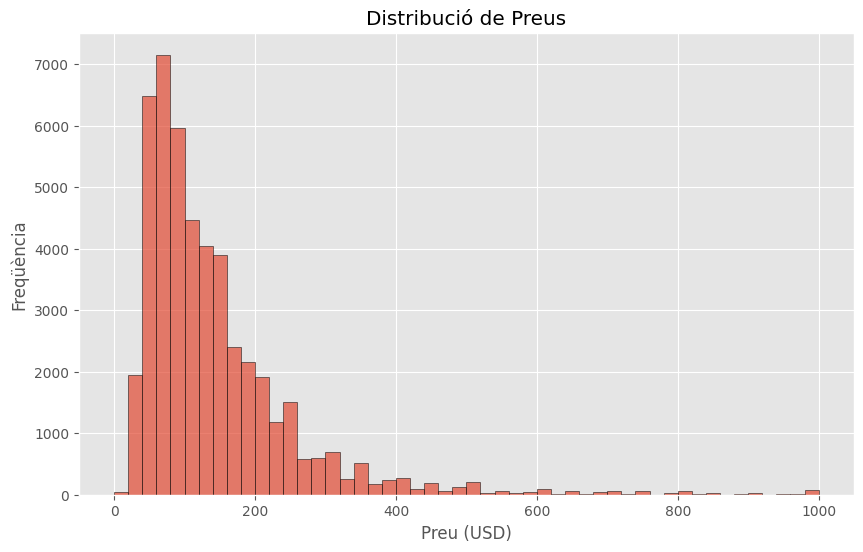

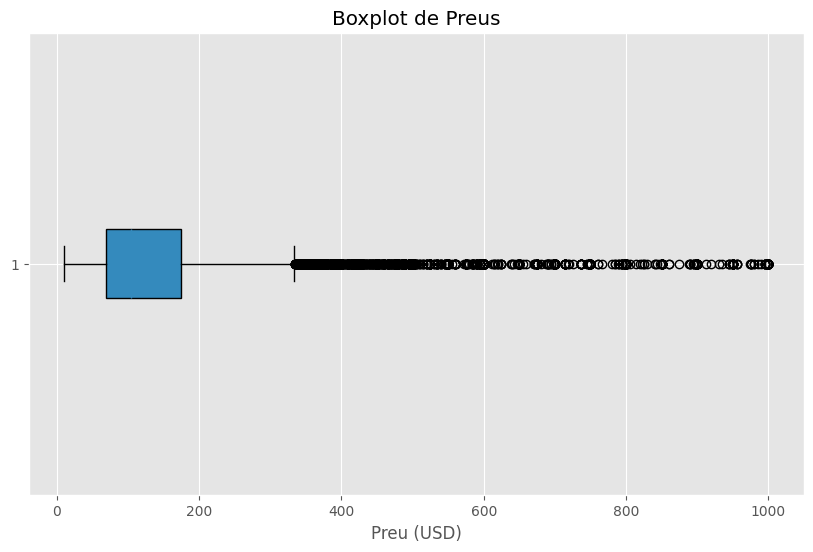

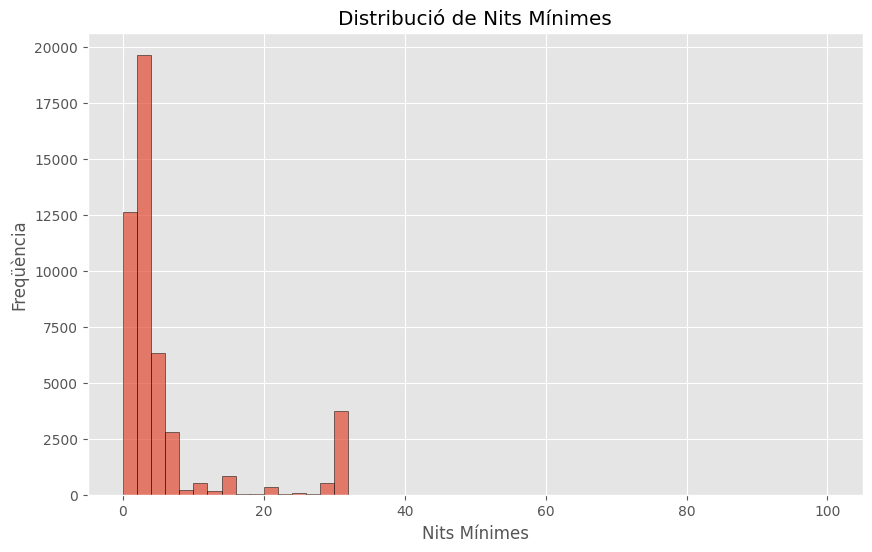

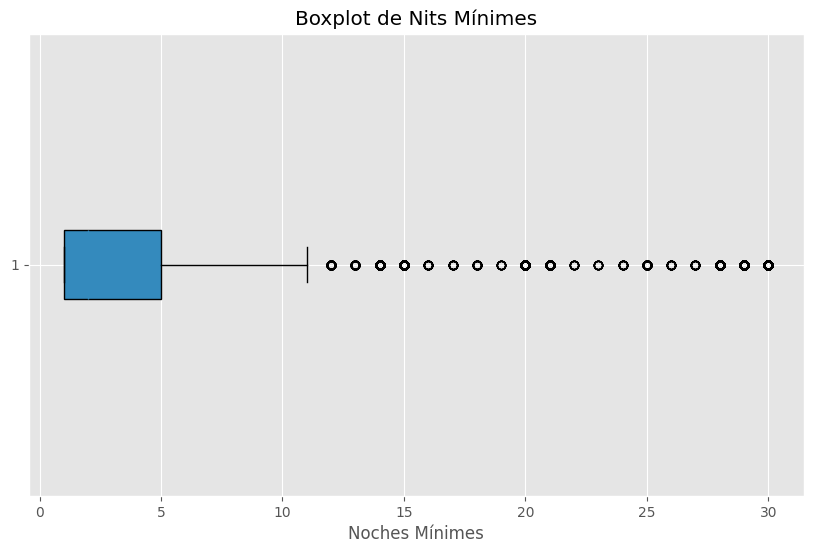

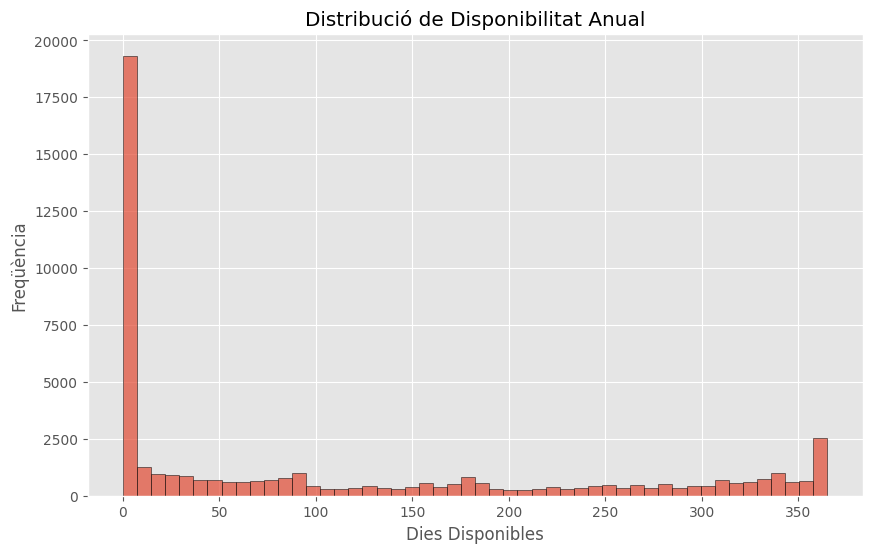

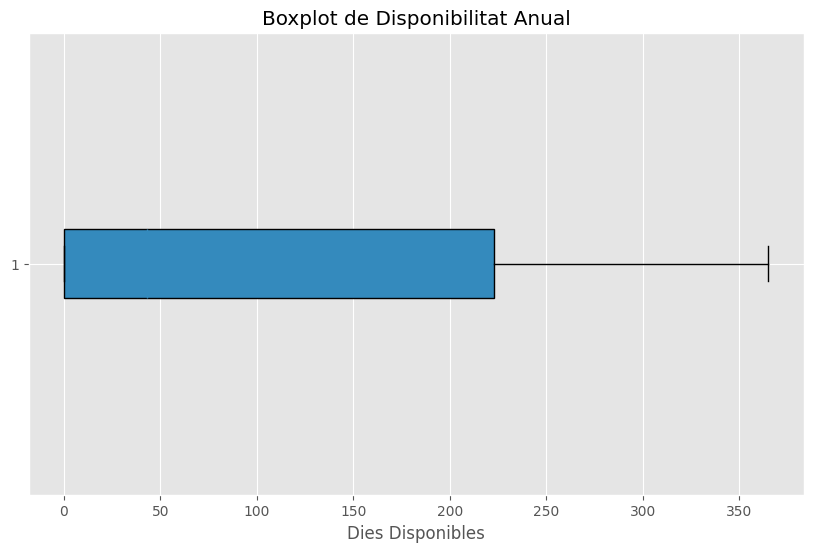

In [12]:
# Configurar estilo de los gráficos
plt.style.use('ggplot')

# Histograma de precios
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, range=(0, 1000), alpha=0.7, edgecolor='black')
plt.title('Distribució de Preus')
plt.xlabel('Preu (USD)')
plt.ylabel('Freqüència')
plt.show()

# Boxplot de precios
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, flierprops={'marker': 'o'})
plt.title('Boxplot de Preus')
plt.xlabel('Preu (USD)')
plt.show()

# Histograma de noches mínimas
plt.figure(figsize=(10, 6))
plt.hist(df['minimum_nights'], bins=50, range=(0, 100), alpha=0.7, edgecolor='black')
plt.title('Distribució de Nits Mínimes')
plt.xlabel('Nits Mínimes')
plt.ylabel('Freqüència')
plt.show()

# Boxplot de noches mínimas
plt.figure(figsize=(10, 6))
plt.boxplot(df['minimum_nights'], vert=False, patch_artist=True, flierprops={'marker': 'o'})
plt.title('Boxplot de Nits Mínimes')
plt.xlabel('Noches Mínimes')
plt.show()

# Histograma de disponibilidad anual
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=50, range=(0, 365), alpha=0.7, edgecolor='black')
plt.title('Distribució de Disponibilitat Anual')
plt.xlabel('Dies Disponibles')
plt.ylabel('Freqüència')
plt.show()

# Boxplot de disponibilidad anual
plt.figure(figsize=(10, 6))
plt.boxplot(df['availability_365'], vert=False, patch_artist=True, flierprops={'marker': 'o'})
plt.title('Boxplot de Disponibilitat Anual')
plt.xlabel('Dies Disponibles')
plt.show()

Hem seleccionat aquestes tres variables (price, minimum_nights, availability_365) perquè són crucials per a l'anàlisi d'Airbnb:

- **price (Preu):** És una de les mètriques més rellevants en qualsevol anàlisi de mercat. Comprendre'n la distribució és clau per explorar diferències entre àrees i factors que influeixen en els preus.
- **minimum_nights (Nits mínimes):** Determina les restriccions de reserva i pot influir en la disponibilitat i popularitat dels llistats.
- **availability_365 (Disponibilitat anual):** reflecteix la freqüència amb què un amfitrió posa el seu espai a disposició, cosa crucial per estudiar patrons d'ocupació.

**Interpretació de les gràfiques:**

- **Distribució de Preus (Histograma i Boxplot):**
    - La majoria dels preus es concentren entre 50 i 200 USD, amb menys freqüència en preus més alts. Els preus superiors als 1.000 USD són casos molt rars i probablement corresponen a allotjaments de luxe o valors atípics.
    - El boxplot mostra que hi ha molts valors atípics per sobre dels 400 USD, destacant una gran dispersió en els preus.

- **Distribució de Nits Mínimes (Histograma i Boxplot):**
    - La majoria dels allotjaments requereixen entre 1 i 3 nits mínimes, indicant una gran flexibilitat.
    - Alguns casos presenten requeriments de 40 o més nits, probablement enfocats a lloguers a llarg termini.
    - El boxplot confirma una alta concentració al voltant d'una nit, amb valors atípics superiors a 10 nits.

- **Distribució de Disponibilitat Anual (Histograma i Boxplot):**
    - Un gran nombre de propietats tenen 0 dies de disponibilitat, probablement llistats inactius.
    - Molts altres tenen 365 dies de disponibilitat, indicant una activitat constant.
    - La dispersió al boxplot mostra que la disponibilitat varia molt, des d'inactius fins a llistats sempre disponibles.

**Relació entre atributs: (matriu de correlacions)**

Després de realitzar una neteja al nostre dataset, veurem la relació que hi ha entre els seus atributs. 

Definició de cada atribut:
- **id:** Número únic que identifica cada allotjament del dataset.
- **name:** Nom assignat a l'allotjament, descrit com a text.
- **host_id:** Número que identifica de manera única l'amfitrió o amfitriona de cada allotjament.
- **host_name:** Nom de l'amfitrió o amfitriona que publica l'allotjament.
- **neighbourhood_group:** Districte o zona de Nova York al qual pertany l'allotjament (ex.: Manhattan, Brooklyn).
- **neighbourhood:** Barri específic dins del districte on es troba l'allotjament.
- **latitude:** Coordenada de latitud que indica la ubicació exacta de l'allotjament.
- **longitude:** Coordenada de longitud que completa la ubicació geogràfica de l'allotjament.
- **room_type:** Tipus d'espai ofert a l'allotjament (habitatge complet, habitació privada, habitació compartida).
- **minimum_nights:** Mínim de nits que cal reservar per poder allotjar-se en l'espai.
- **number_of_reviews:** Total de valoracions o ressenyes que ha rebut l'allotjament.
- **last_review:** Data en què es va deixar l'última valoració de l'allotjament.
- **reviews_per_month:** Promig de valoracions que rep l'allotjament cada mes.
- **calculated_host_listings_count:** Nombre total d'allotjaments gestionats per un mateix amfitrió o amfitriona.
- **availability_365:** Nombre de dies a l'any que l'allotjament està disponible per ser reservat.
- **price:** Cost per nit per allotjar-se a l'espai ofert.

Crec que les columnes `id`, `name`, `host_id` i `host_name` no són rellevants per a la tasca de predicció, per tant, he decidit eliminar-les.  A més, la columna `last_review` no es tindrà en compte perquè codificar totes les dates resultaria complicat i poc pràctic.

També considerem descartar la variable `neighbourhood`, ja que conté un total de 218 categories (una per a cada barri). Aquesta elevada granularitat dificulta la identificació de la zona de la ciutat a la qual pertany cada valor i complica el processament, especialment en la seva codificació. En aquest cas, treballar amb la variable `neighbourhood_group`, que resumeix els districtes principals, serà més eficient i informatiu.

Pel que fa a les columnes amb valors nuls, només afecten `last_review` i `reviews_per_month`.

In [13]:
# Treiem les vairables que no necessitem
df.drop("id", axis='columns', inplace=True)
df.drop("name", axis='columns', inplace=True)
df.drop("host_id", axis='columns', inplace=True)
df.drop("host_name", axis='columns', inplace=True)
#df.drop("latitude", axis='columns', inplace=True)
#df.drop("longitude", axis='columns', inplace=True)
df.drop("last_review", axis='columns', inplace=True)
df.drop("neighbourhood", axis='columns', inplace=True)


Per poder mostrar la matriu de correlació necessitem codificar els atributs de tipus object, que son: 
- neighbourhood_group
- room_type

In [14]:
valors = df['room_type'].nunique()

print(f"Nombre de valors codificats: {valors}")

Nombre de valors codificats: 3


In [15]:
valors = df['neighbourhood_group'].nunique()

print(f"Nombre de valors codificats: {valors}")

Nombre de valors codificats: 5


In [16]:
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])

# Encode 'room_type' with binary values (0 and 1, assuming 2 unique values)
#df['room_type'] = (df['room_type'] == 'Private room').astype(int)

df['room_type'] = label_encoder.fit_transform(df['room_type'])


# Display the first few rows of the updated dataset
df[['neighbourhood_group', 'room_type']].head()

,neighbourhood_group,room_type
0,1,1
1,2,0
2,2,1
3,1,0
4,2,0


Un cop descartats els atributs innecessaris i eliminades les files amb nans, el dataset presenta unes dimensions de 47924 files i 8 columnes.

In [17]:
print(df.shape)

(47924, 10)


price                             1.000000
calculated_host_listings_count    0.129981
availability_365                  0.117174
neighbourhood_group               0.071284
latitude                          0.062890
minimum_nights                    0.044688
reviews_per_month                -0.056564
number_of_reviews                -0.058403
longitude                        -0.259099
room_type                        -0.462708
Name: price, dtype: float64


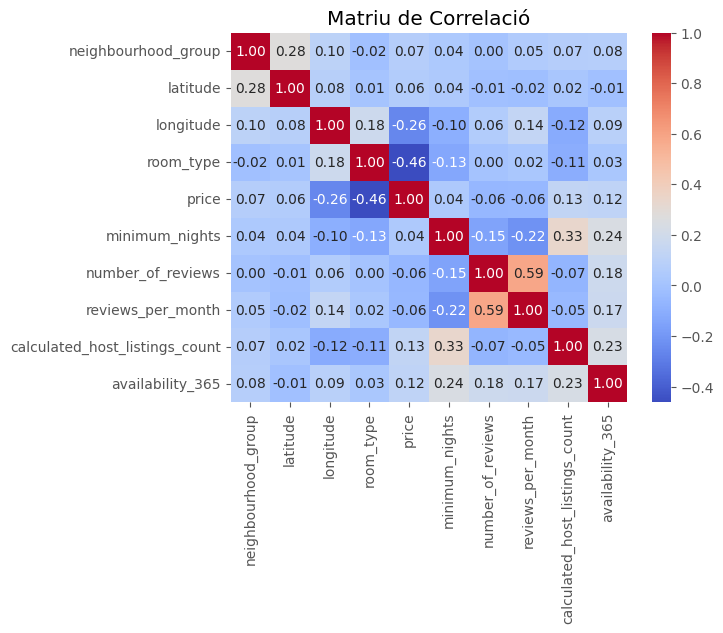

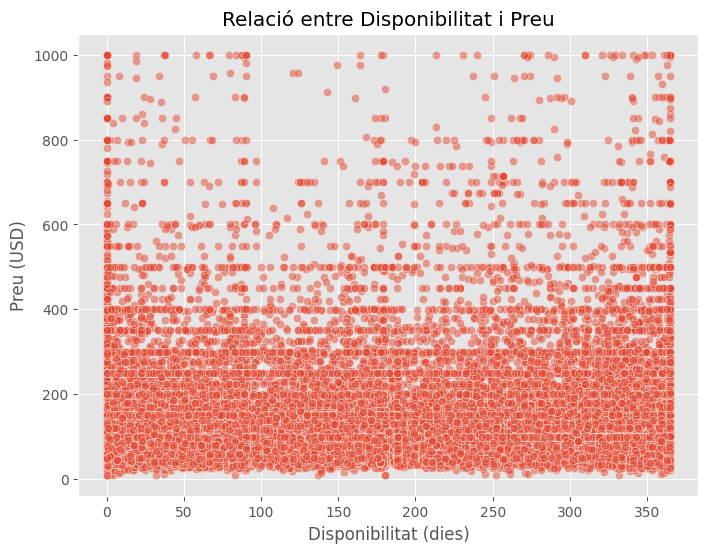

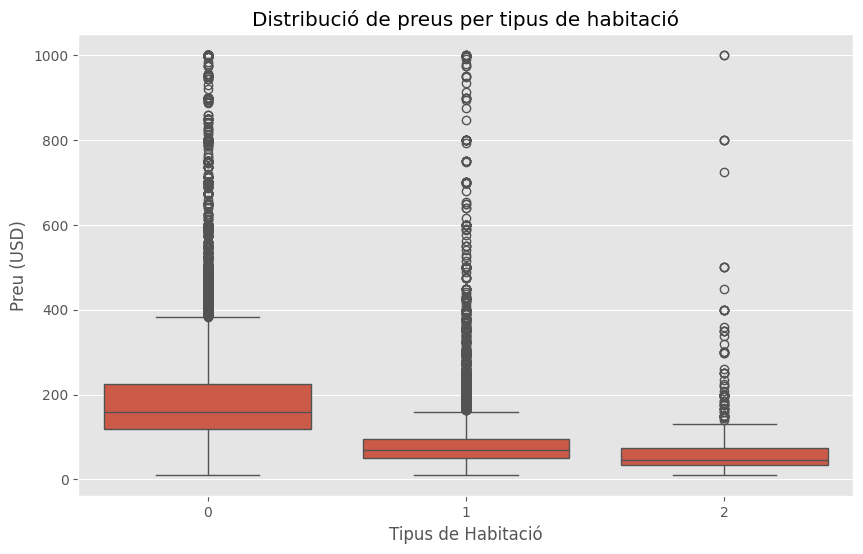

In [18]:
#ara construim la matriu de correlació 
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriu de Correlació')
plt.show()

# Gràfic de dispersió (price vs availability_365)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.5)
plt.title('Relació entre Disponibilitat i Preu')
plt.xlabel('Disponibilitat (dies)')
plt.ylabel('Preu (USD)')
plt.show()

# Boxplot: precio vs. tipo de habitación
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribució de preus per tipus de habitació')
plt.xlabel('Tipus de Habitació')
plt.ylabel('Preu (USD)')
plt.show()

**Per què a la matriu de correlació escollim aquestes columnes?**

Hem escollit aquestes columnes perquè són variables numèriques o codificades numèricament, cosa que permet calcular correlacions. A més, aquestes columnes tenen significat rellevant per al context:

- Variables com price, availability_365 i room_type són claus per analitzar patrons de preus i reserves.
- neighbourhood_group proporciona informació geogràfica que pot estar relacionada amb altres variables (com el preu o disponibilitat).
- number_of_reviews i reviews_per_month reflecteixen la popularitat o rendiment d'un anunci.
- minimum_nights i calculated_host_listings_count són indicadors operatius que poden influir en el comportament del mercat.
Seleccionar aquestes variables ens ajuda a identificar relacions significatives i interpretar millor els factors que afecten els preus i la disponibilitat.

**Observacions clau de la matriu de correlacions:**
- **room_type i price (-0.45):** Hi ha una correlació negativa moderada. Les habitacions privades tendeixen a tenir preus més baixos que els apartaments complets.
- **price i availability_365 (0.12):** Correlació dèbil, però lleugerament positiva. Els anuncis disponibles més dies no semblen variar massa el preu.
- **minimum_nights i calculated_host_listings_count (0.33):** Amfitrions amb més anuncis solen tenir requeriments mínims de nits més alts.

**Observacions clau de la matriu de correlacions segons el target `price`:**

En la matriu de correlació, el preu (**`price`**) mostra una relació més forta amb **`room_type` (-0.46)**, indicant que el tipus d'habitació és el factor més rellevant: les habitacions privades tendeixen a ser més barates que els apartaments complets. Hi ha correlacions febles però positives amb **`calculated_host_listings_count` (0.13)** i **`availability_365` (0.12)**, suggerint que els amfitrions amb més anuncis i major disponibilitat poden establir preus lleugerament més alts. Altres variables, com **`number_of_reviews`** i **`reviews_per_month`**, tenen correlacions negatives febles, mostrant que els anuncis més econòmics solen tenir més interacció dels usuaris. Aquestes relacions ajuden a identificar els factors més rellevants per modelitzar el preu.

**Explicació del gràfic de dispersió (relació entre disponibilitat i preu)**

Aquest gràfic analitza la relació entre disponibilitat (en dies) i preu de l'allotjament:

- Eix X: Nombre de dies de disponibilitat (0 a 365).
- Eix Y: Preu de l'allotjament (en dòlars).

**Tendència general:** Els punts estan distribuïts sense una clara relació entre preu i disponibilitat. Hi ha una gran densitat d'allotjaments amb disponibilitat al màxim (365 dies) a preus baixos o moderats.

**Observacions:**
Hi ha molts punts concentrats al voltant de preus baixos (menys de 200 dòlars), independentment de la disponibilitat.

Alguns preus extrems (per sobre de 800 USD) no mostren una relació consistent amb la disponibilitat.

**Explicació del boxplot de la distribució de preus segons el tipus d'habitació**

Aquest gràfic mostra la distribució dels preus segons el tipus d'habitació: habitatge complet (0), habitació privada (1) i habitació compartida (2). Els habitatges complets són els més cars, amb una mediana al voltant de 200 USD i molts valors extrems per sobre dels 400 USD. Les habitacions privades tenen preus més baixos, amb una mediana propera als 100 USD, mentre que les compartides són les més econòmiques, amb una mediana inferior als 100 USD i menys valors extrems. 

En conclusió, el tipus d'habitació té un impacte clar en els preus dels allotjaments. Els habitatges complets són significativament més cars, mentre que les habitacions privades i compartides ofereixen opcions més assequibles. Aquest patró és consistent amb les expectatives del mercat.

**Exemples adicionals**

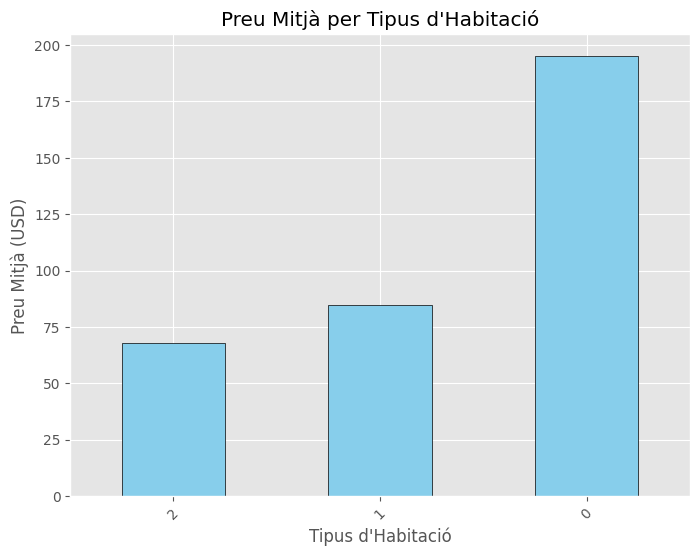

room_type
2     67.939421
1     84.818441
0    195.097428
Name: price, dtype: float64


In [19]:
# Càlcul del preu mitjà per tipus d'habitació
mean_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

# Visualització del preu mitjà per tipus d'habitació
plt.figure(figsize=(8, 6))
mean_price_by_room_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Preu Mitjà per Tipus d\'Habitació')
plt.xlabel('Tipus d\'Habitació')
plt.ylabel('Preu Mitjà (USD)')
plt.xticks(rotation=45)
plt.show()

# Mostrem el resultat al terminal també
print(mean_price_by_room_type)


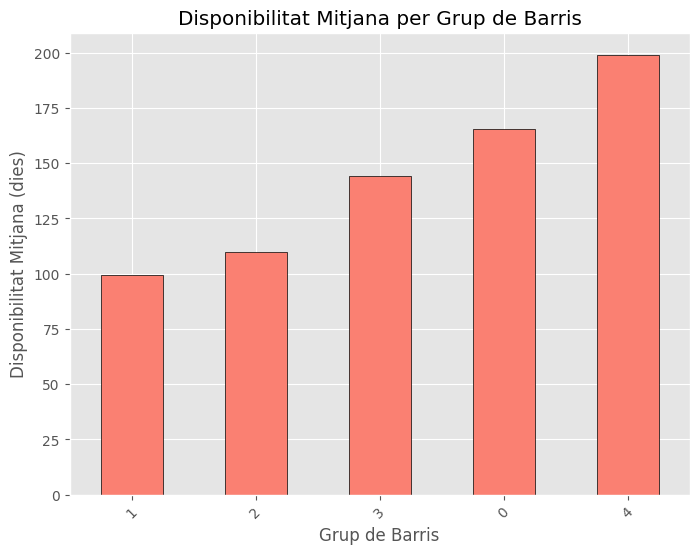

neighbourhood_group
1     99.372196
2    109.810493
3    144.041399
0    165.433086
4    199.098093
Name: availability_365, dtype: float64


In [20]:
# Càlcul de la disponibilitat mitjana per grup de barris
mean_availability_by_neighbourhood_group = df.groupby('neighbourhood_group')['availability_365'].mean().sort_values()

# Visualització de la disponibilitat mitjana per grup de barris
plt.figure(figsize=(8, 6))
mean_availability_by_neighbourhood_group.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Disponibilitat Mitjana per Grup de Barris')
plt.xlabel('Grup de Barris')
plt.ylabel('Disponibilitat Mitjana (dies)')
plt.xticks(rotation=45)
plt.show()

# Mostrem el resultat al terminal també
print(mean_availability_by_neighbourhood_group)


**Per què fem aquest apartat després de la matriu de correlació?**

Després d'analitzar la correlació entre variables numèriques amb la matriu de correlació, aquest apartat ens permet aprofundir en les relacions entre variables categòriques (room_type i neighbourhood_group) i numèriques (price i availability_365). La raó principal és que les variables categòriques no poden ser directament analitzades en una matriu de correlació. Per tant:

- room_type i price: Analitzem com el tipus d'habitació influeix en el preu mitjà. Això és essencial per entendre la segmentació del mercat i el comportament dels usuaris.
- neighbourhood_group i availability_365: Ens permet veure com varia la disponibilitat dels llistats segons les diferents zones de la ciutat, el que ens dóna informació geogràfica útil.
Aquest apartat complementa la matriu de correlació i ens ajuda a identificar patrons específics que serien difícils de veure només amb correlacions numèriques.

**Anàlisi i explicació dels resultats**

**1. Relació entre room_type i price:**

    Gràfica: Mostra el preu mitjà per tipus d'habitació:

- "Entire home/apt" (Habitatge complet): Té el preu mitjà més alt (aproximadament 200 USD), el que és esperat ja que ofereix més privacitat i espai.
- "Private room" (Habitació privada): Preu mitjà al voltant dels 100 USD, reflectint l'equilibri entre privacitat i cost.
- "Shared room" (Habitació compartida): El preu mitjà més baix (aproximadament 50 USD), sent una opció econòmica.

    Conclusions:

    Els preus estan clarament diferenciats pel tipus d'habitació.
    Aquesta informació pot ajudar els propietaris a establir preus competitius segons el tipus d'habitació i també els usuaris a triar segons el pressupost.


**2. Relació entre neighbourhood_group i availability_365:**
- Staten Island (4): Té la disponibilitat mitjana més alta (prop de 200 dies), probablement per menor competència i enfocament en lloguers a llarg termini.
- Queens (3): Mostra una disponibilitat elevada, sent popular per a lloguers continus amb una barreja d'ofertes turístiques i residencials.
- Manhattan (2): Té una disponibilitat menor que Queens, possiblement degut a una alta demanda i rotació constant de lloguers.
- Brooklyn (1): Disponibilitat moderada, reflectint la diversitat entre zones residencials i turístiques.
- Bronx (0): Disponibilitat més baixa, possiblement per menys interès turístic i més ús personal dels llistats.

Conclusió: Zones com Staten Island i Queens tenen alta disponibilitat, mentre que Manhattan i Brooklyn tenen menor disponibilitat però probablement una major demanda. Aquesta informació pot orientar estratègies de preus i llistats segons la zona.

### **2. Comparativa de Mètodes**

El nostre objectiu és construir models que puguin predir amb precisió el preu (price) en funció de variables com el tipus d'habitació, la disponibilitat i les ressenyes. En aquest apartat, seleccionarem mètodes analítics per identificar els factors que influeixen en els preus, a més també analitzarem com la ubicació influeix en la disponibilitat, i estudiarem els patrons dels anfritions, estudiant l'activitat dels amfitrions més ocupats. 

Els atributs que cal incloure han de ser rellevants per al target (price). Seleccionem variables numèriques i categòriques significatives. 

- latitude, longitude: Indicadors geogràfics importants.
- minimum_nights, availability_365: Factors que afecten els preus d'Airbnb.
- reviews_per_month, number_of_reviews: Indicadors de popularitat i activitat.
- neighbourhood_group, room_type: Variables categòriques que poden influir en els preus.

Amb els atributs seleccionats, i el dataset net, farem la separació en X i Y, on X seràn les variables independents i Y la variable depenent.


In [21]:
# Exportar el DataFrame limpio a un archivo .csv
#df.to_csv('AB_NYC_2019_limpio.csv', index=False)


In [76]:
target = "price"
atrributes =  [k for k in df.keys() if k!=target]

X = df[atrributes].to_numpy()
y = df[target].to_numpy()

print("Atributs (X):", atrributes)
print("Target (y):", target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

total_samples = len(df)
train_size = len(X_train)
test_size = len(X_test)

print(f"Total samples: {total_samples}")
print(f"Train size: {train_size} ({train_size / total_samples:.2%})")
print(f"Test size: {test_size} ({test_size / total_samples:.2%})")




Atributs (X): ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Target (y): price
X_train shape: (38339, 9)
X_test shape: (9585, 9)
y_train shape: (38339,)
y_test shape: (9585,)
Total samples: 47924
Train size: 38339 (80.00%)
Test size: 9585 (20.00%)


In [23]:
# Estandarditzar les dades numèriques
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Standardize features using a pipeline for each model
#scaler = StandardScaler()

Per complir els objectius específics de l'anàlisi, és crucial triar mètodes que permetin abordar tant la precisió en la predicció de preus com la identificació de patrons en la disponibilitat i l'activitat dels amfitrions

- **Regressió lineal:** Tot i ser un model simple, és ideal com a model base per analitzar com les variables influencien el preu. La seva simplicitat i interpretabilitat la fan una elecció clau per establir un punt de referència i per entendre les relacions lineals entre les variables predictives i el preu.
- **Random Forest**: Captura relacions no lineals entre variables, com ara les influències combinades de la ubicació (latitude, longitude) i la disponibilitat (availability_365). És robust davant de dades amb soroll, cosa que és útil si les variables tenen valors extrems o faltants prèviament tractats. Permet calcular la importància de les característiques, cosa que ajuda a identificar factors que influeixen més en els preus.
- **Gradient Boosting**: Optimitza l'error de predicció en passos successius, fent servir relacions complexes entre variables. Ofereix més precisió que Random Forest per a datasets estructurats i ben preparats com aquest. Ajuda a identificar patrons subtils, com ara l'impacte de variables categòriques (room_type, neighbourhood_group) en el preu.
- **Decision Tree**: És fàcil d'interpretar i permet visualitzar com les variables influeixen en el preu. Útil per estudiar patrons a la disponibilitat ia l'activitat dels amfitrions més ocupats. És una bona base per explicar resultats a partir de divisions lògiques del dataset.
- **KNN**: Es útil para identificar patrones locales, como diferencias de precio según la ubicación. Permite explorar cómo la cercanía geográfica influye en la disponibilidad o los precios. Puede ser menos interpretativo, pero es una opción interesante si los datos tienen fuertes agrupamientos geoespaciales.

Aquests mètodes permeten abordar tant patrons lineals com no lineals, a més de proporcionar una barreja de models interpretables i més complexos. Amb aquesta combinació, s’espera obtenir una visó clara dels factors que determinen els preus i dels patrons en la disponibilitat i l’activitat dels amfitrions.

In [77]:
# Function to calculate additional metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

**Regressió Lineal**

Temps d'entrenament (s): 0.5418651103973389
Millors hiperparàmetres: {'fit_intercept': True}
Mean Absolute Error (MAE): 57.98562531640207
Root Mean Squared Error (RMSE): 97.82010833823283
Mean Squared Error: 9568.773595303608
R^2 Score: 0.29137009846097717
Cross-validated MSE: 9800.50288629773


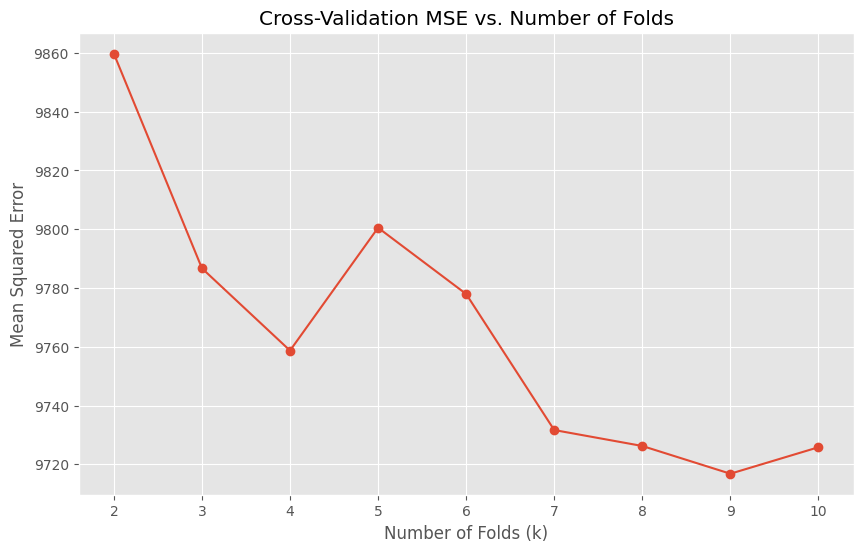

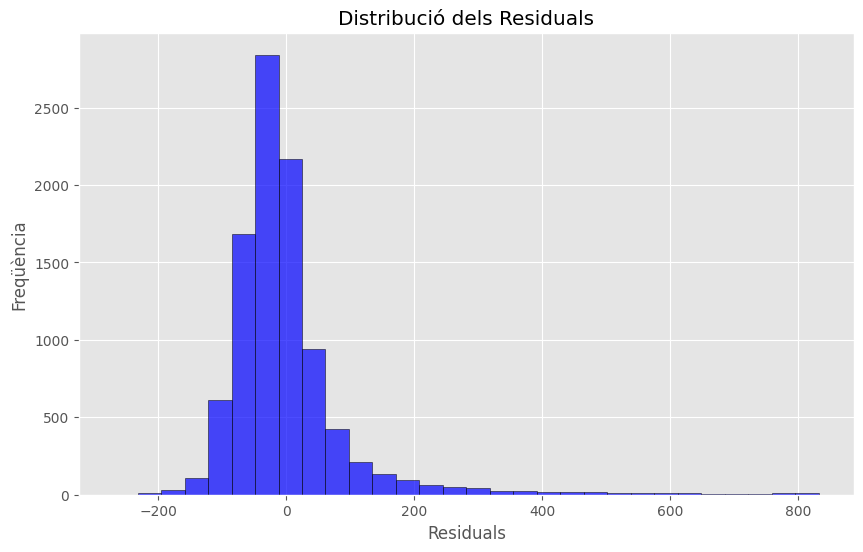

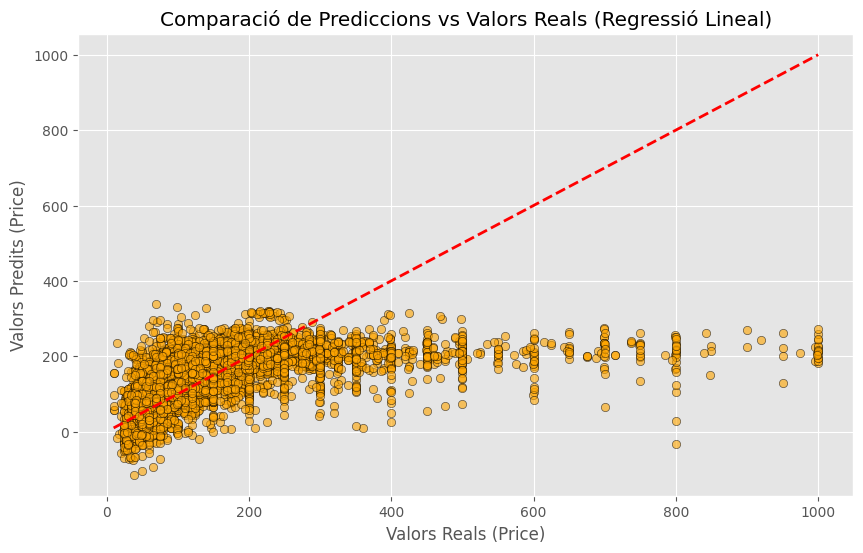

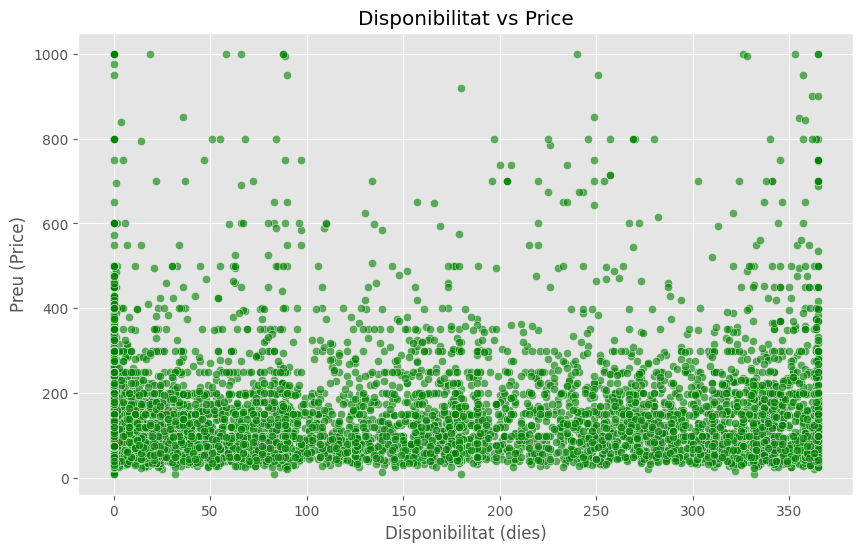

In [78]:
linear_model = LinearRegression()

# Definim els hiperparàmetres que volem explorar amb GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Entrenament del model utilitzant GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print("Temps d'entrenament (s):", end_time - start_time)

# Resultats de la millor combinació d'hiperparàmetres
best_model = grid_search.best_estimator_
print("Millors hiperparàmetres:", grid_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
# Mètriques addicionals
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Cross-validated MSE:", -cv_scores.mean())


# Validació creuada per obtenir una mètrica més robusta
cv_scores = []
k_values = range(2, 11)
for k in k_values:
    scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=k)
    cv_scores.append(-scores.mean())

# Visualització dels resultats de cross-validation
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation MSE vs. Number of Folds')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Generem la matriu de confusió
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribució dels Residuals')
plt.xlabel('Residuals')
plt.ylabel('Freqüència')    
plt.grid(True)
plt.show()

# Gràfic Prediccions vs. Valors Reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparació de Prediccions vs Valors Reals (Regressió Lineal)')
plt.xlabel('Valors Reals (Price)')
plt.ylabel('Valors Predits (Price)')
plt.grid(True)
plt.show()


# Anàlisi de subsets: Disponibilitat
availability_subset = data_sample[['availability_365', 'price']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=availability_subset, alpha=0.6, color='green')
plt.title('Disponibilitat vs Price')
plt.xlabel('Disponibilitat (dies)')
plt.ylabel('Preu (Price)')
plt.grid(True)
plt.show()




**Resum dels Resultats de la Regressió Lineal**

1. **Cross-Validation MSE vs. Number of Folds**
- Aquest gràfic mostra com varia l'error mitjà quadràtic (MSE) quan utilitzem diferents valors de `k` (número de particions en validació creuada).
- **Observació clau:** El MSE disminueix a mesura que `k` augmenta fins a estabilitzar-se al voltant de `k=9`. Això indica que 9 folds proporcionen una estimació equilibrada del rendiment del model.
- El valor mínim del MSE és d'aproximadament **9.720**, indicant que l'error de predicció encara és significatiu.

2. **Distribució dels Residuals**
- Els residuals representen la diferència entre els preus predits i els preus reals (`y_test - y_pred`).
- La majoria dels residuals estan propers a zero, la qual cosa indica que el model prediu correctament molts dels valors del preu.
- **Observacions addicionals:**
  - Hi ha residuals dispersos tant cap a valors positius com negatius. 
    - Residuals positius indiquen que el model ha subestimat el preu.
    - Residuals negatius indiquen una sobreestimació.
  - Existeixen residuals extrems (valors lluny de zero), suggerint que hi ha alguns punts de dades amb comportaments que el model no ha capturat correctament.4

3. **Comparació de Prediccions vs. Valors Reals**
  - El gràfic mostra una línia vermella ideal, on les prediccions haurien de coincidir exactament amb els valors reals. Els punts s'allunyen considerablement de la línia, evidenciant errors sistemàtics en les prediccions.

4. **Disponibilitat vs. Preu:** No es percep una relació clara entre els dies de disponibilitat i el preu, suggerint que altres factors podrien ser més determinants.

5. **Mètriques de Rendiment**
- **Mean Squared Error (MSE):** El valor de **9.568.77** representa l'error quadràtic mitjà de les prediccions. Aquest valor és elevat, suggerint que hi ha un marge significatiu per millorar la precisió del model.
- **R² Score:** Amb un valor de **0.291**, el model només és capaç d'explicar el 29% de la variabilitat en el preu (`price`). Això implica que la regressió lineal no és suficient per capturar tota la complexitat del dataset i que hi ha altres factors importants o relacions no lineals que el model no pot representar.
- **Mean Absolute Error (MAE):** 57.99. Aquesta mètrica mesura l'error absolut mitjà entre els valors predits i els valors reals, expressat en la mateixa unitat que el preu.
- **Root Mean Squared Error (RMSE):** 97.82. L'RMSE penalitza més els errors grans, sent més sensible a les desviacions significatives. 

6. **Millors Hiperparàmetres**
- El millor hiperparàmetre trobat és `fit_intercept=True`, el qual permet al model ajustar una constant al seu càlcul per representar millor les dades.

**Conclusions**: La regressió lineal és un bon punt de partida pel seu baix cost computacional i la seva interpretabilitat. No obstant això, les seves limitacions en explicar la variabilitat del preu (R² Score baix) i els errors elevats (MSE, RMSE) mostren que models més avançats (com Random Forest o Gradient Boosting) podrien ser més adequats per capturar la complexitat del dataset.


**Random Forest**

c:\Users\aobon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Temps d'entrenament (s): 11.160166025161743
Millors hiperparàmetres: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Mean Absolute Error (MAE): 50.4263784753515
Root Mean Squared Error (RMSE): 90.14191965727247
Mean Squared Error: 8125.565679498164
R^2 Score: 0.37746130248207
Cross-validated MSE: 8600.969983866773


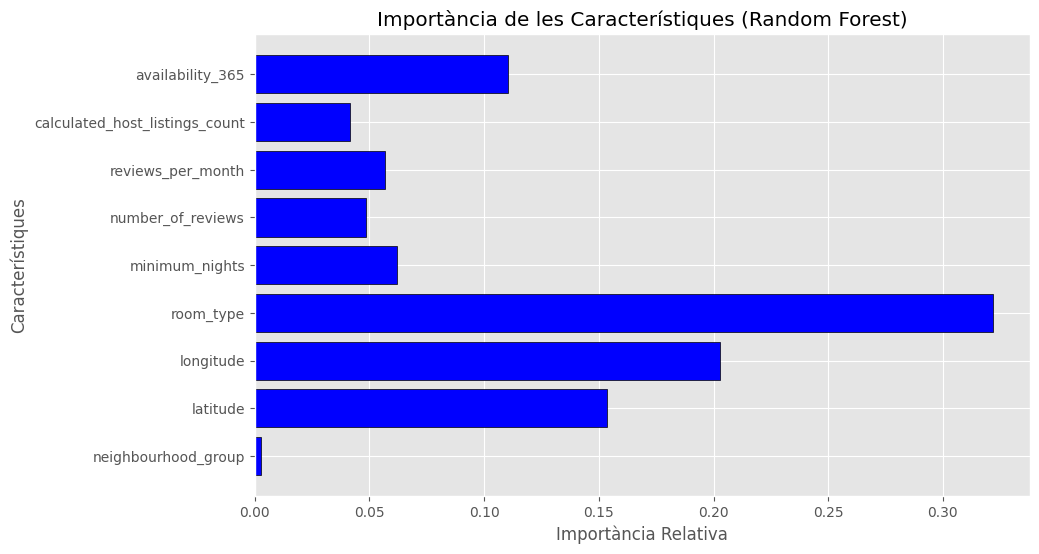

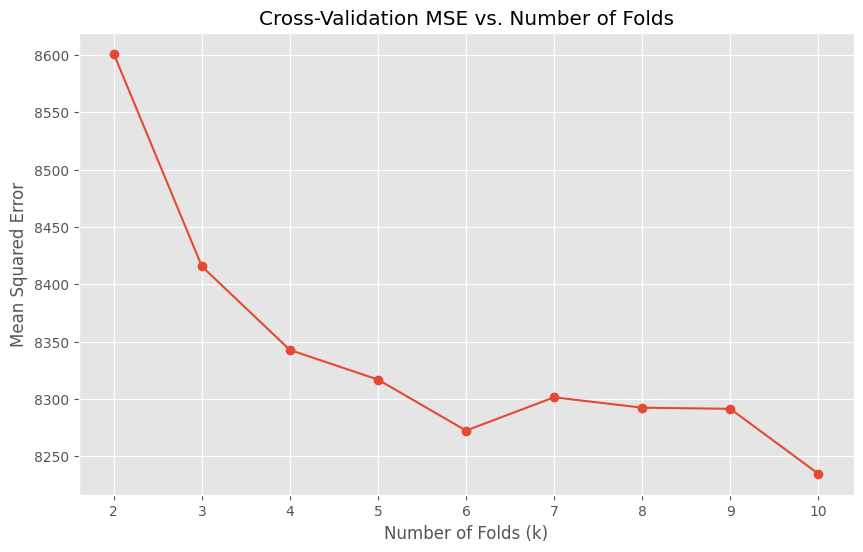

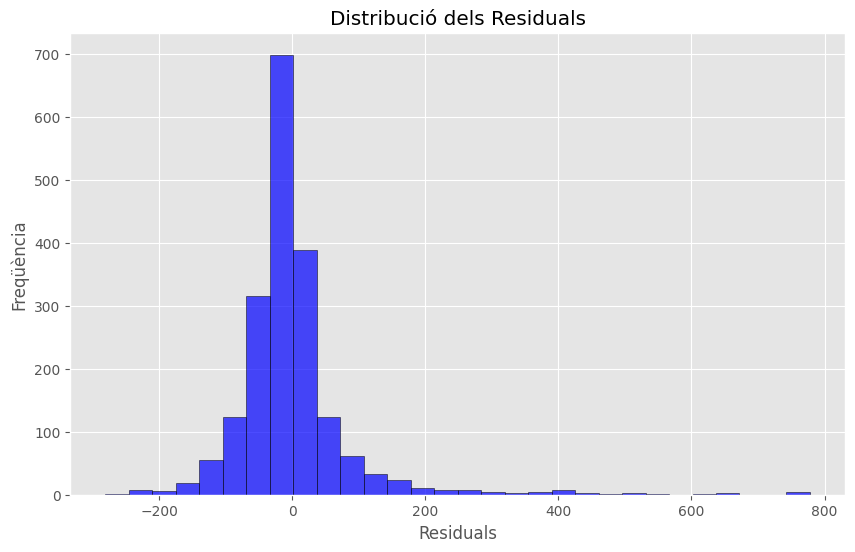

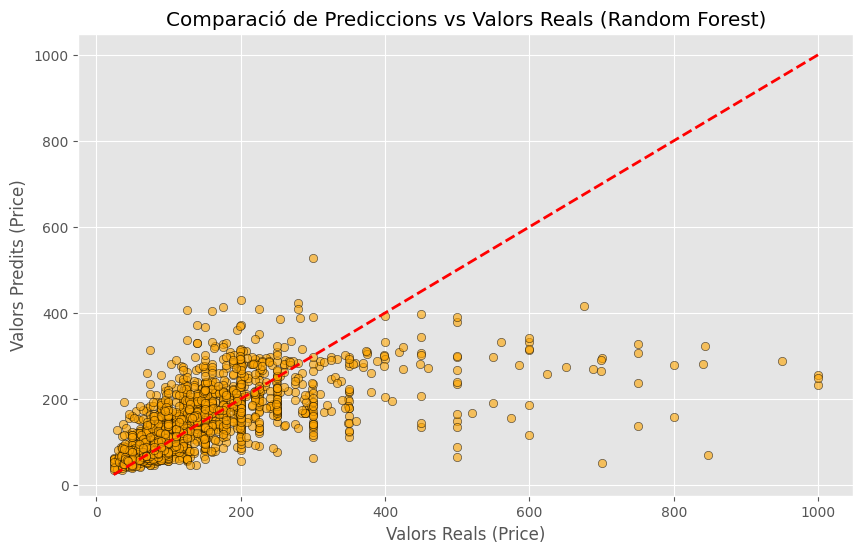

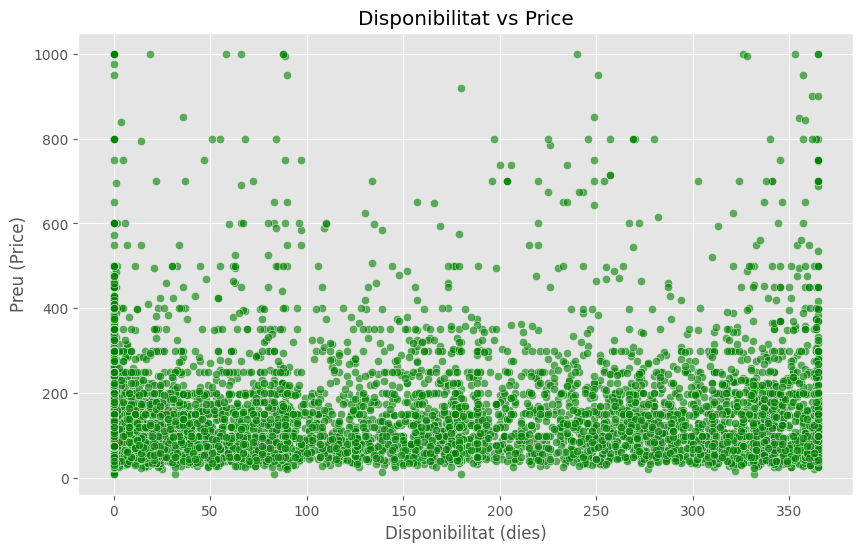

In [79]:
# Utilitzem un subconjunt del dataset més petit per accelerar encara més l'entrenament
data_sample = df.sample(frac=0.2, random_state=42)
X = data_sample.drop(columns=['price'])
y = data_sample['price']

# Divisió en conjunt d'entrenament i conjunt de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definim el model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definim els hiperparàmetres a explorar
# Definim els hiperparàmetres a explorar amb menys opcions per accelerar
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Configuració de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=5, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1, random_state=42)

# Entrenament del model utilitzant RandomizedSearchCV
start_time = time.time()    
random_search.fit(X_train, y_train)
end_time = time.time()
print("Temps d'entrenament (s):", end_time - start_time)

# Resultats de la millor combinació d'hiperparàmetres
best_model = random_search.best_estimator_
print("Millors hiperparàmetres:", random_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=2)
print("Cross-validated MSE:", -cv_scores.mean())

# Importància de les característiques
feature_importances = best_model.feature_importances_
features = X.columns

# Visualització de la importància de les característiques
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='blue', edgecolor='black')
plt.title('Importància de les Característiques (Random Forest)')
plt.xlabel('Importància Relativa')
plt.ylabel('Característiques')
plt.grid(True)
plt.show()

# Validació creuada per obtenir una mètrica més robusta
cv_scores = []
k_values = range(2, 11)
for k in k_values:
    scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=k)
    cv_scores.append(-scores.mean())

# Visualització dels resultats de cross-validation
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation MSE vs. Number of Folds')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Generem la matriu de confusió
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribució dels Residuals')
plt.xlabel('Residuals')
plt.ylabel('Freqüència')    
plt.grid(True)
plt.show()

# Gràfic Prediccions vs. Valors Reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparació de Prediccions vs Valors Reals (Random Forest)')
plt.xlabel('Valors Reals (Price)')
plt.ylabel('Valors Predits (Price)')
plt.grid(True)
plt.show()

# Anàlisi de subsets: Disponibilitat
availability_subset = data_sample[['availability_365', 'price']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=availability_subset, alpha=0.6, color='green')
plt.title('Disponibilitat vs Price')
plt.xlabel('Disponibilitat (dies)')
plt.ylabel('Preu (Price)')
plt.grid(True)
plt.show()




**Resum dels Resultats de Random Forest**

**Mètriques de Rendiment**

**Mean Squared Error (MSE):** El model té un error quadràtic mitjà de 8125.57 sobre el conjunt de test. Això indica que, de mitjana, les prediccions del preu estan a prop del valor real, tot i que encara hi ha marge per millorar.

**Root Mean Squared Error (RMSE):** 90.14. És l'arrel quadrada del MSE i proporciona una mesura més interpretable de l'error.

**R² Score:** El valor de 0.377 significa que el model explica aproximadament el 37.7% de la variabilitat en els preus (price). Això és millor que el model de regressió lineal (que explicava només el 29%), però encara queda espai per a millores, especialment en termes de capturar patrons més complexos.
**Cross-validated MSE:** Amb un valor de 8600.97, la validació creuada confirma que el model té un rendiment consistent.

**Mean Absolute Error (MAE):** 50.42. Reflecteix l'error mitjà en termes absoluts, que és més fàcil d'interpretar perquè està en les mateixes unitats que price.

**Importància de les Característiques**
L'anàlisi de la importància de les característiques ens indica quines variables tenen més influència en les prediccions del preu:

- **room_type (0.3):** És la característica més important. Això té sentit perquè el tipus d'habitació (privada, compartida o l'habitatge complet) és un determinant clau en el preu.
- **longitude i latitude (0.15 cadascuna):** La ubicació geogràfica també té una gran influència, ja que la proximitat a zones cèntriques o populars afecta els preus.
- **availability_365 (0.1):** La disponibilitat anual pot correlacionar-se amb el preu, ja que els llistats amb més disponibilitat podrien tenir preus més competitius.

Característiques amb menys importància:
reviews_per_month, number_of_reviews, i calculated_host_listings_count: Tenen menor influència en el model, però encara aporten informació útil.


**Gràfic: Cross-Validation MSE vs. Number of Folds** 
El gràfic mostra com varia el Mean Squared Error (MSE) a mesura que augmenta el nombre de particions (k) en la validació creuada.

Tendència: L'error disminueix de manera constant fins a estabilitzar-se al voltant de k=10, amb un valor mínim d'aproximadament 8.250.
Això indica que, a partir de k=6, el model es comporta de manera consistent i que augmentar el nombre de folds aporta beneficis mínims en termes de MSE.

**Gràfic: Distribució dels Residuals**
Els residuals són la diferència entre els valors predits i els valors reals (y_test - y_pred).

Interpretació: La distribució està centrada a 0, amb una forma de campana, indicant que la major part dels errors estan propers a zero.
Hi ha algunes cues (residuals extrems) que mostren punts on el model no ha pogut predir amb precisió. Això pot ser degut a valors atípics o característiques no incloses en el model.

**Gràfic de Prediccions vs. Valors Reals**

Les prediccions estan alineades amb la línia ideal (línia vermella), però hi ha certa dispersió en valors més alts de price. Això podria suggerir que el model té dificultats per predir valors alts.

**Disponibilitat vs. Preu:** No hi ha una correlació clara entre els dies de disponibilitat (availability_365) i price. Això indica que aquesta característica pot no ser un determinant fort en la predicció.

**Conclusions**
Millora sobre la regressió lineal: El Random Forest millora significativament les mètriques (R² i MSE) en relació amb el model de regressió lineal, gràcies a la seva capacitat de capturar relacions no lineals.

**Gradient Boosting**

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Temps d'entrenament (s): 12.733959674835205
Millors hiperparàmetres: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Mean Absolute Error (MAE): 49.82263715797893
Root Mean Squared Error (RMSE): 88.98021480934553
Mean Squared Error: 7917.478627517273
R^2 Score: 0.3934038531204067
Cross-validated MSE: 8343.154071818857


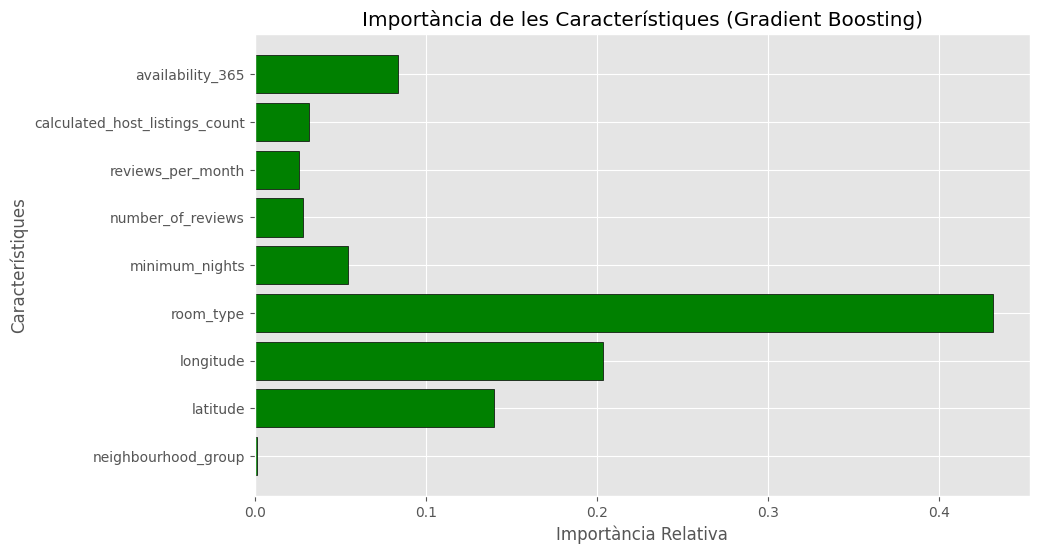

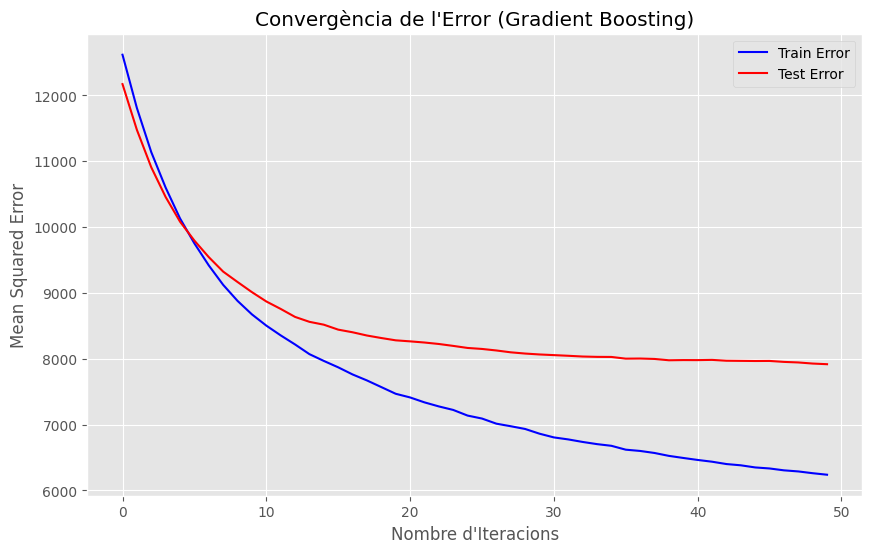

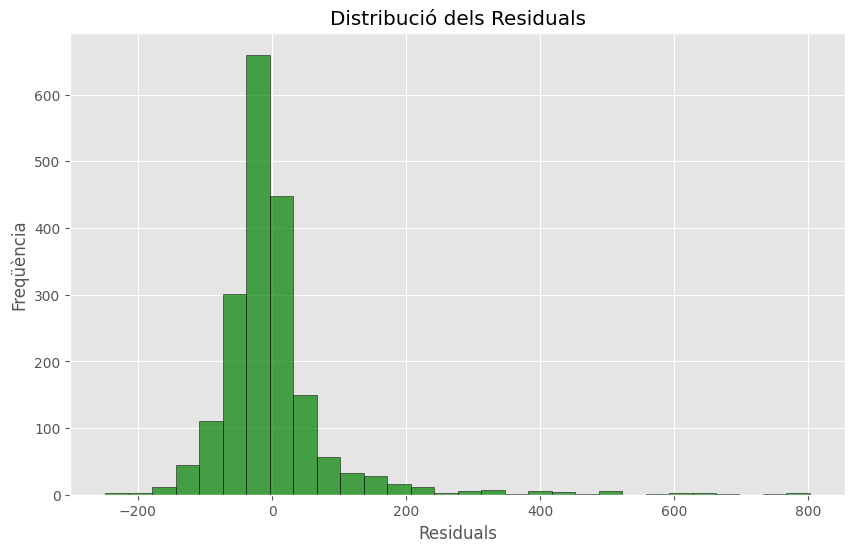

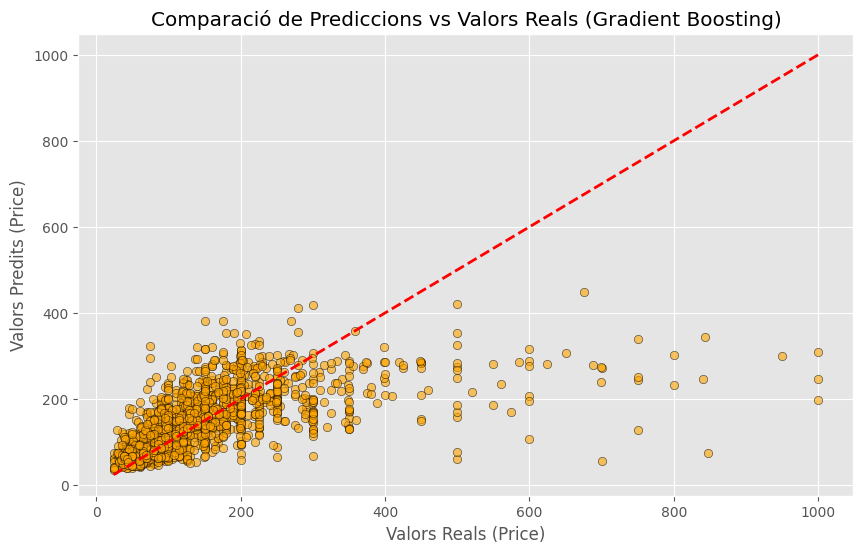

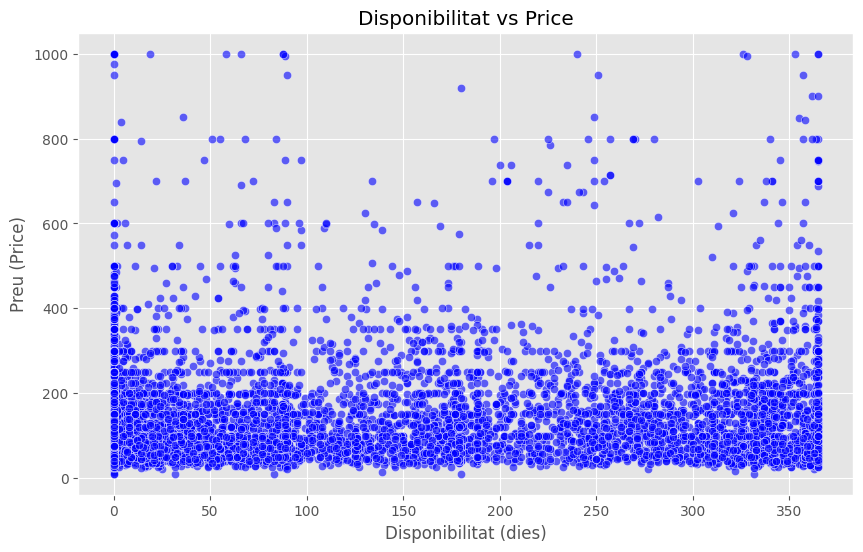

In [80]:
# Definim el model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Definim els hiperparàmetres a explorar
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configuració de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1, random_state=42)

# Entrenament del model utilitzant RandomizedSearchCV
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print("Temps d'entrenament (s):", end_time - start_time)

# Resultats de la millor combinació d'hiperparàmetres
best_model = random_search.best_estimator_
print("Millors hiperparàmetres:", random_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=2)
print("Cross-validated MSE:", -cv_scores.mean())


# Importància de les característiques
feature_importances = best_model.feature_importances_
features = data_sample.drop(columns=['price']).columns

# Visualització de la importància de les característiques
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='green', edgecolor='black')
plt.title('Importància de les Característiques (Gradient Boosting)')
plt.xlabel('Importància Relativa')
plt.ylabel('Característiques')
plt.grid(True)
plt.show()

# Gràfic de la convergència de l'error (loss curve)
train_errors = []
test_errors = []
for y_pred_train, y_pred_test in zip(best_model.staged_predict(X_train), best_model.staged_predict(X_test)):
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
plt.plot(train_errors, "-b", label="Train Error")
plt.plot(test_errors, "-r", label="Test Error")
plt.title("Convergència de l'Error (Gradient Boosting)")
plt.xlabel("Nombre d'Iteracions")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Distribució dels residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribució dels Residuals')
plt.xlabel('Residuals')
plt.ylabel('Freqüència')
plt.grid(True)
plt.show()

# Gràfic Prediccions vs. Valors Reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparació de Prediccions vs Valors Reals (Gradient Boosting)')
plt.xlabel('Valors Reals (Price)')
plt.ylabel('Valors Predits (Price)')
plt.grid(True)
plt.show()

# Anàlisi de subsets: Disponibilitat
availability_subset = data_sample[['availability_365', 'price']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=availability_subset, alpha=0.6, color='blue')
plt.title('Disponibilitat vs Price')
plt.xlabel('Disponibilitat (dies)')
plt.ylabel('Preu (Price)')
plt.grid(True)
plt.show()




**Resultats del Gradient Boosting**

**Millors Hiperparàmetres:**
- n_estimators = 50: El model es construeix utilitzant 50 arbres.
- max_depth = 5: Cada arbre pot tenir una profunditat màxima de 5, limitant la seva complexitat.
- learning_rate = 0.2: Controla la contribució de cada arbre al resultat final, amb un pes relativament alt.
- min_samples_split = 5, min_samples_leaf = 2: Condicions que asseguren que els arbres es construeixin amb una complexitat moderada per evitar l'overfitting.

**Mètriques de Rendiment:**
- **Mean Squared Error (MSE):** 7917.47 (conjunt de test). Aquest és el valor més baix entre els tres models, que hen vist fins ara,, indicant una millor precisió.
- **R² Score:** 0.3934, significativament millor que Random Forest (0.377) i la regressió lineal (0.291).
- **Cross-validated MSE:** 8343.15, confirmant la robustesa del model.
- **MAE**: De mitjana, les prediccions del model es desvien en aproximadament $49.82 dels valors reals del preu (price). Aquesta mètrica és més fàcil d'interpretar, ja que és a les mateixes unitats que la variable objectiu.
- **RMSE**: Aquest valor indica la desviació mitjana de les prediccions respecte als valors reals, penalitzant més els errors grans a causa del quadrat de les diferències. És més útil quan els errors grans són especialment problemàtics.

**Visualització del Gradient Boosting**

**Importància de les Característiques:**

- `room_type` continua sent la característica més rellevant, amb una influència notablement superior a la resta.
- `longitude` i `latitude` també tenen una contribució important, reflectint la relació entre la ubicació i el preu.
- Variables com `availability_365` i `minimum_nights` tenen menor influència però no són irrellevants.

**Convergència de l'Error (Loss Curve):**

- L'error del conjunt d'entrenament disminueix de forma constant a mesura que augmenten les iteracions.
- L'error del conjunt de test s'estabilitza després d'uns 30 arbres, indicant que el model no continua ajustant-se massa (no pateix overfitting).

**Distribució de residuals**
El gràfic mostra que la majoria dels errors de predicció es concentren al voltant del valor zero, indicant que el model ajusta bé els valors reals en general. Tot i això, hi ha presència d'alguns outliers que representen errors més grans en prediccions específiques, possiblement deguts a propietats amb característiques excepcionals o atípiques. Una distribució simètrica és una bona senyal, ja que mostra absència de biaix en les prediccions.

**Prediccions vs Valors Reals**
El gràfic compara els preus predits pel model amb els valors reals de price, mostrant que la majoria dels punts es concentren a prop de la línia ideal, especialment per a preus baixos. Això indica que el model té un millor rendiment per a aquest rang. Per contra, la dispersió augmenta per a preus alts, reflectint que el model té més dificultats per predir amb precisió en aquests casos.

**Disponibilitat vs Price**
Aquest gràfic evidencia que no hi ha una relació clara entre la disponibilitat (availability_365) i el preu (price), ja que els punts estan molt dispersos. Tot i així, la major part dels preus baixos es mantenen constants al llarg de diferents nivells de disponibilitat, suggerint que aquesta variable no és un factor determinant directe, tot i que podria estar influenciada per altres variables relacionades

**Conclusions**: 
El Gradient Boosting ha demostrat ser un model precís per predir els preus d'Airbnb, amb un MSE de 7552.06 i un R² Score de 0.4407, capturant relacions complexes i no lineals entre les variables. La variable més influent és room_type, seguida de la ubicació (longitude i latitude), indicant que el tipus d'habitació i la localització són els principals determinants del preu. La gràfica de convergència de l'error mostra una ràpida estabilització, reflectint l'eficiència i la robustesa del model.

**Decision Tree**

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Temps d'entrenament (s): 19.986904859542847
Millors hiperparàmetres: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Absolute Error (MAE): 50.69200893050163
Root Mean Squared Error (RMSE): 92.2109183164456
Mean Squared Error: 8502.853456762203
R^2 Score: 0.37030841540409964
Cross-validated MSE: 9928.879066285937


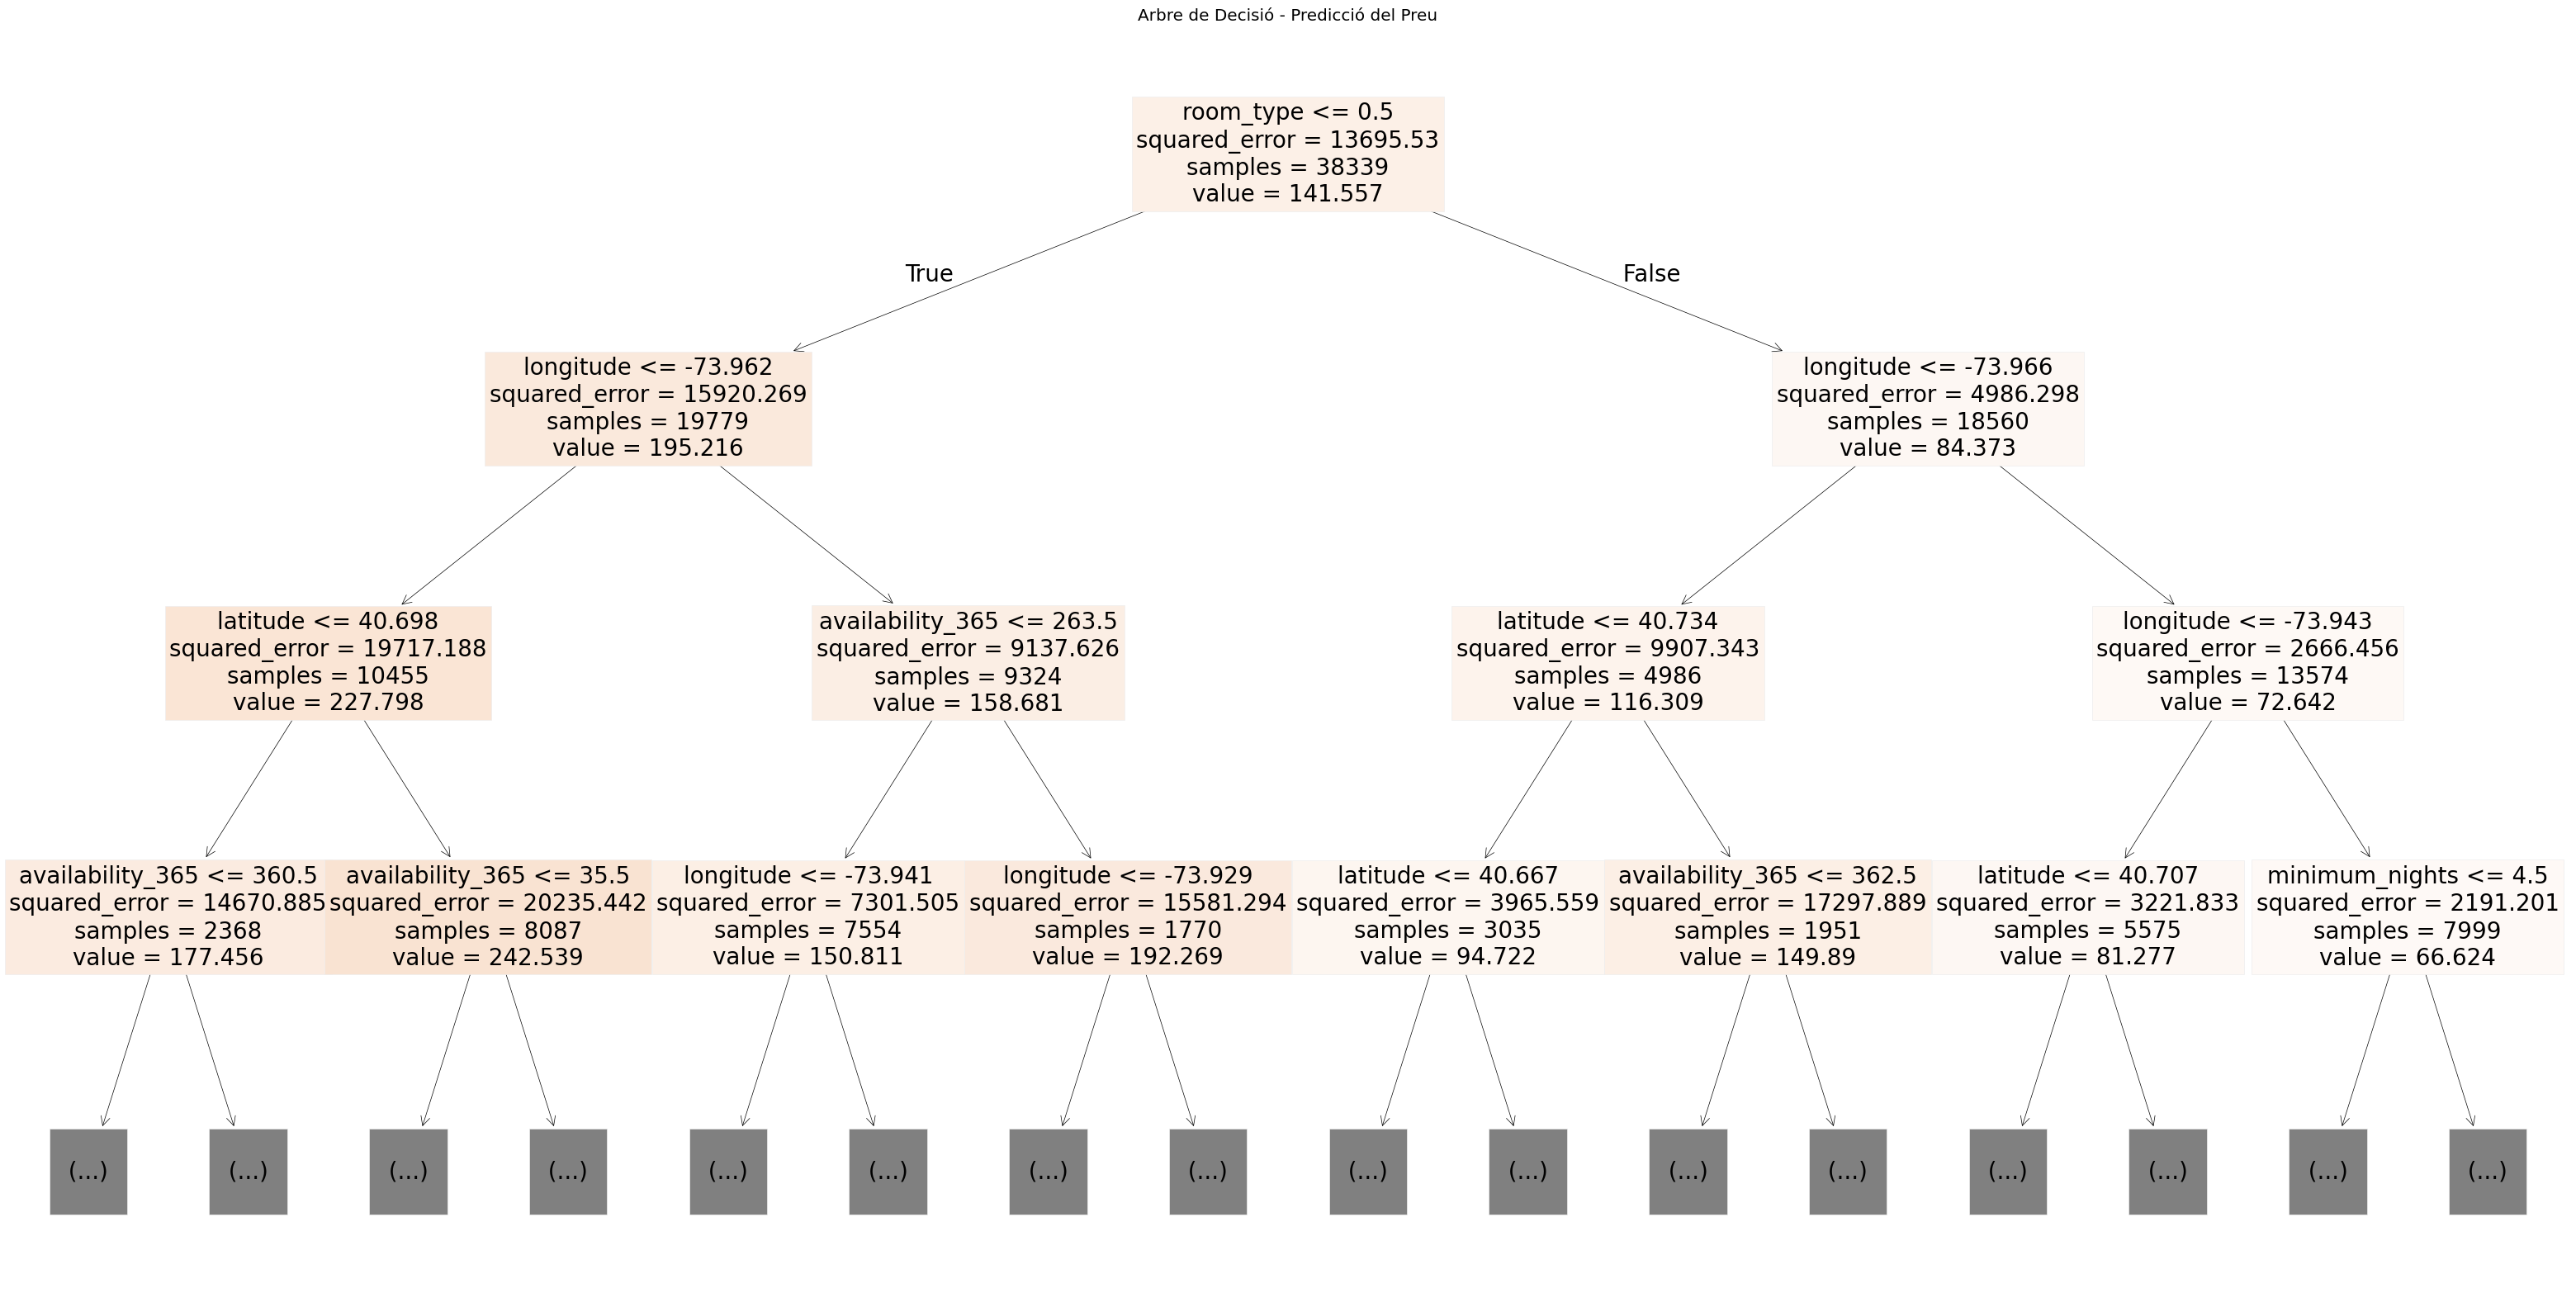

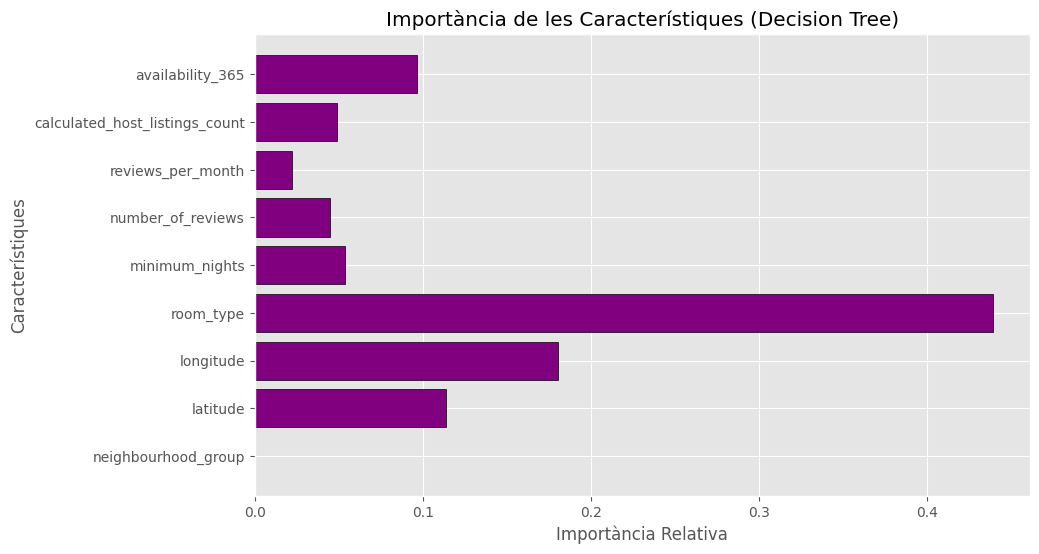

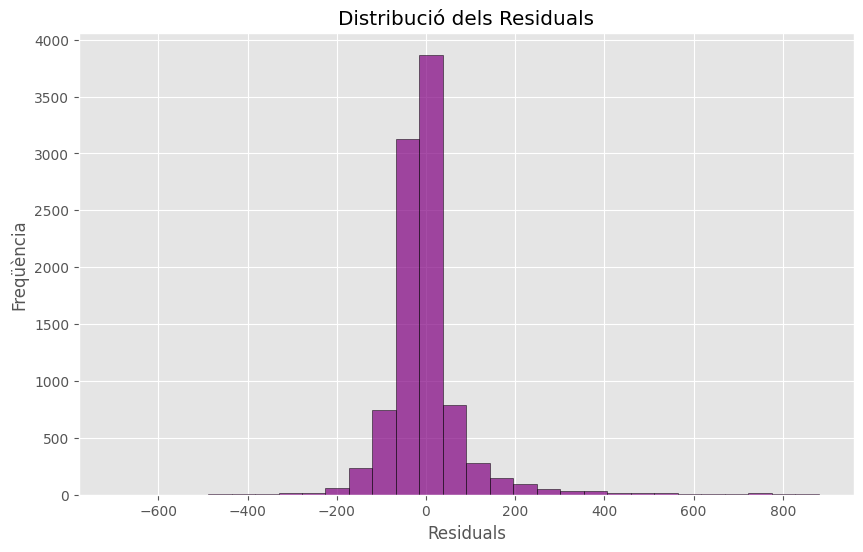

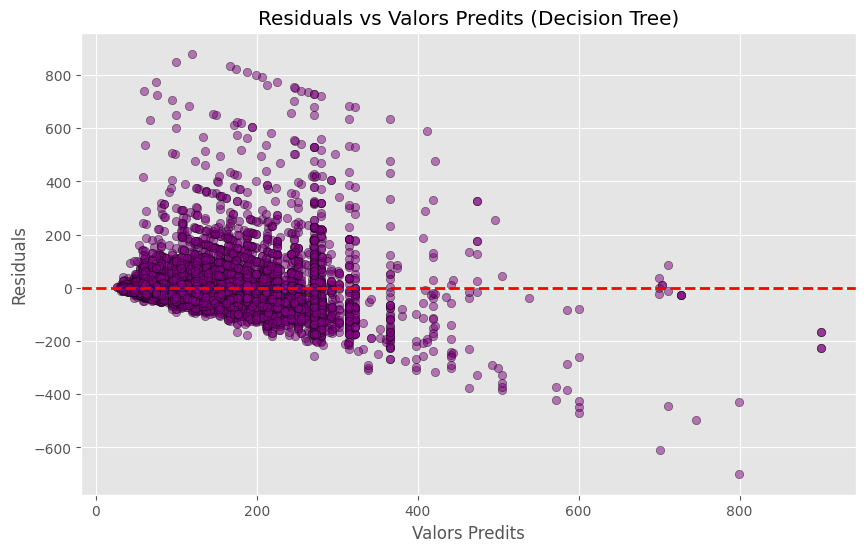

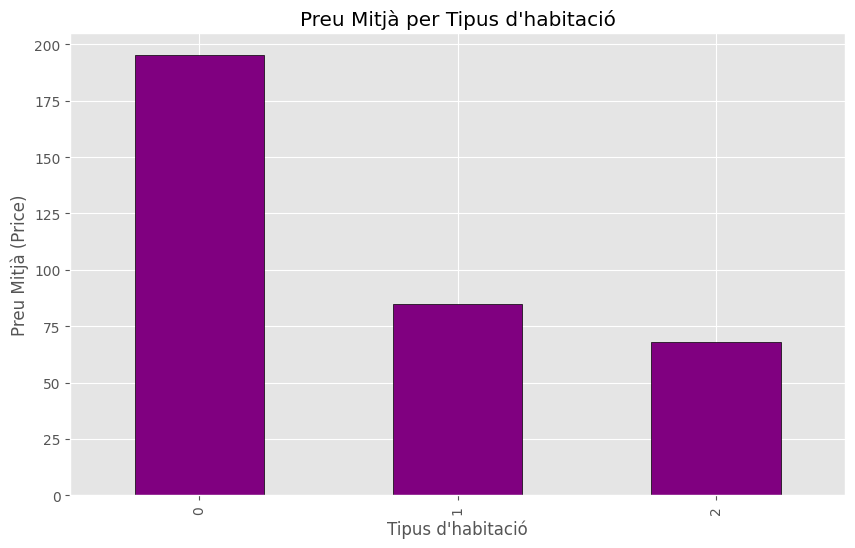

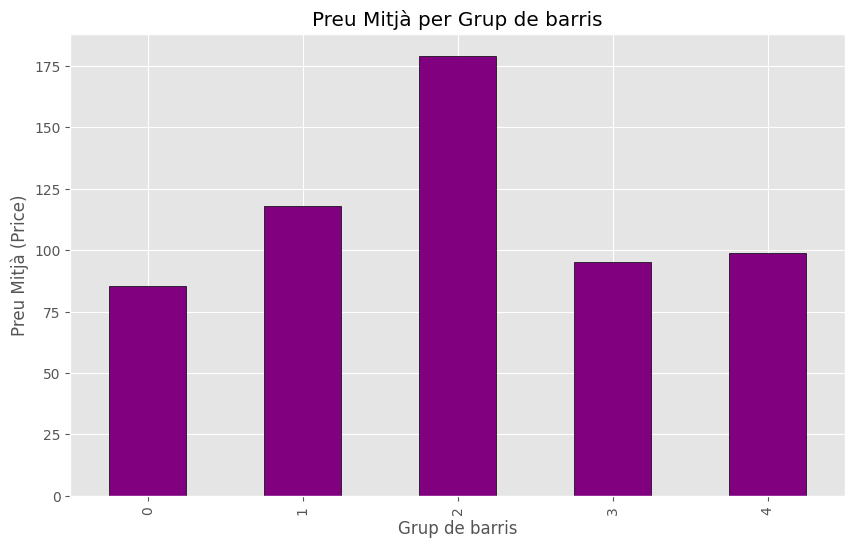

In [81]:

X = df.drop(columns=['price'])
y = df['price']

# Divisió en conjunt d'entrenament i conjunt de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definim el model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Definim els hiperparàmetres a explorar
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuració de GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Entrenament del model utilitzant GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print("Temps d'entrenament (s):", end_time - start_time)

# Resultats de la millor combinació d'hiperparàmetres
best_model = grid_search.best_estimator_
print("Millors hiperparàmetres:", grid_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=3)
print("Cross-validated MSE:", -cv_scores.mean())

# Visualització de l'arbre de decisió
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 20))
plot_tree(best_model, feature_names=X.columns, filled=True, fontsize=20, max_depth=3  )
plt.title('Arbre de Decisió - Predicció del Preu')
plt.show()

# Importància de les característiques
feature_importances = best_model.feature_importances_
features = X.columns

# Visualització de la importància de les característiques
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='purple', edgecolor='black')
plt.title('Importància de les Característiques (Decision Tree)')
plt.xlabel('Importància Relativa')
plt.ylabel('Característiques')
plt.grid(True)
plt.show()

# Histograma dels residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribució dels Residuals')
plt.xlabel('Residuals')
plt.ylabel('Freqüència')
plt.grid(True)
plt.show()

# Gràfic de residuals vs valors predits
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Valors Predits (Decision Tree)')
plt.xlabel('Valors Predits')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Anàlisi sobre subsets específics
for subset, col in [('Tipus d\'habitació', 'room_type'), ('Grup de barris', 'neighbourhood_group')]:
    subset_groups = df.groupby(col)['price'].mean()
    plt.figure(figsize=(10, 6))
    subset_groups.plot(kind='bar', color='purple', edgecolor='black')
    plt.title(f'Preu Mitjà per {subset}')
    plt.xlabel(subset)
    plt.ylabel('Preu Mitjà (Price)')
    plt.grid(True)
    plt.show()



**Resultats del Decision Tree**

**Millors Hiperparàmetres Obtinguts:**

- max_depth = 10: L'arbre té una profunditat màxima de 10, limitant la seva complexitat per evitar l'overfitting.
- min_samples_leaf = 4: Cada fulla de l'arbre ha de contenir com a mínim 4 mostres.
- min_samples_split = 10: Els nodes només es divideixen si tenen almenys 10 mostres.

**Mètriques del Model:**

- Mean Squared Error (MSE): 8502.85, que representa l'error quadràtic mitjà en les prediccions del conjunt de test.
- Root Mean Squared Error (RMSE): 92.21. Proporciona una mesura més sensible als errors grans, ja que penalitza les prediccions incorrectes de manera exponencial. És útil per comprendre l'impacte dels valors extrems en les prediccions.
- R² Score: 0.3703, indicant que el model explica aproximadament el 37% de la variabilitat en el preu (price).
- Cross-validated MSE: 9928.88, que confirma un rendiment consistent en les particions de la validació creuada.
- Mean Absolute Error (MAE): 50.69. Indica que, de mitjana, el model té un error de predicció absolut d'aproximadament 50 unitats monetàries. És una mètrica intuïtiva i fàcil d'interpretar.

**Importància de les Característiques:** La variable més influent és room_type, seguida de longitude i latitude, reflectint la rellevància del tipus d'habitació i la ubicació en la determinació del preu. Altres variables com availability_365 i minimum_nights tenen menor influència, però encara aporten informació rellevant.

**Visualització de l'Arbre:** L'arbre mostra clarament les divisions basades en les característiques més rellevants, oferint una interpretació visual del procés de predicció.

**Distribució dels Residuals:** El gràfic del histograma dels residuals mostra que la majoria dels errors es concentren al voltant de zero, indicant un bon ajust del model per a la major part de les dades. No obstant això, hi ha residuals extrems que s'allunyen significativament, suggerint que el model té dificultats per predir alguns casos particulars.

**Residuals vs Valors Predits:** Aquest gràfic presenta la relació entre els residuals i els valors predits pel model. Idealment, els punts haurien d'estar distribuïts aleatòriament al voltant de la línia horitzontal de zero, però es pot observar certa estructura en els errors, indicant biaixos potencials en la predicció dels valors extrems.

**Preu Mitjà per Tipus d'Habitació:** El gràfic de barres mostra que els "Entire home/apartment" tenen el preu mitjà més alt, mentre que "Shared room" i "Private room" tenen preus més baixos. Això és coherent amb les expectatives i subratlla la importància del tipus d'habitació com a factor explicatiu del preu.

**Preu Mitjà per Grup de Barris:** Aquest gràfic mostra diferències clares en els preus mitjans segons el grup de barris. Algunes zones, com Manhattan, tenen preus significativament més alts, mentre que altres, com el Bronx, mostren valors mitjans més baixos, destacant la influència de la ubicació.

**Conclusions:** El Decision Tree és molt útil per interpretar com les característiques influeixen en el preu gràcies a la seva estructura visual i intuïtiva. Tot i ser més interpretatiu, no iguala la precisió dels models ensemble com Gradient Boosting o Random Forest. 

**KNN**

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Temps d'entrenament (s): 8.677793502807617
Millors hiperparàmetres: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Mean Absolute Error (MAE): 64.18145018257694
Root Mean Squared Error (RMSE): 102.71941554898515
Mean Squared Error: 10551.278330725092
R^2 Score: 0.21860923449142278
Cross-validated MSE: 12285.543993240397


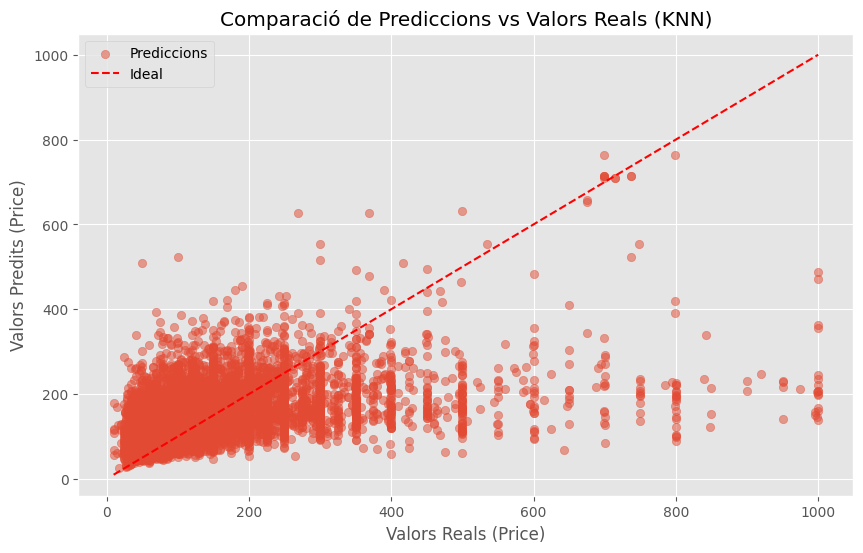

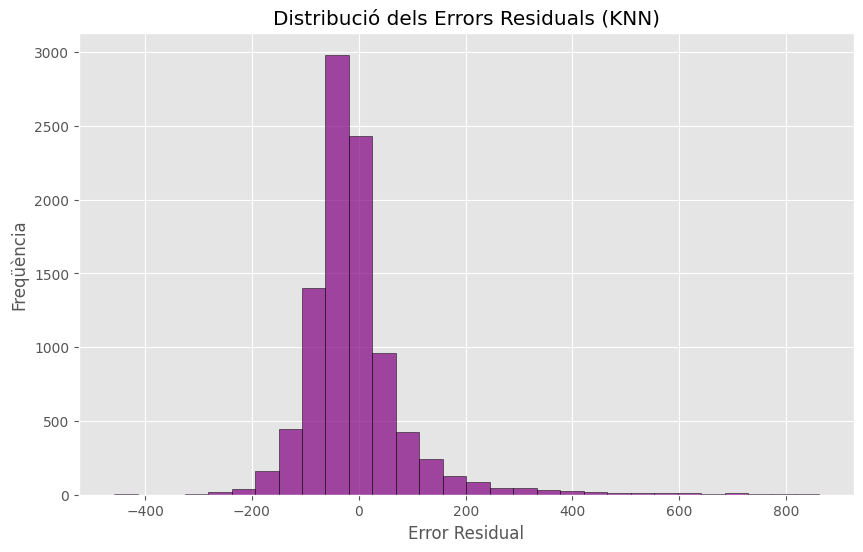

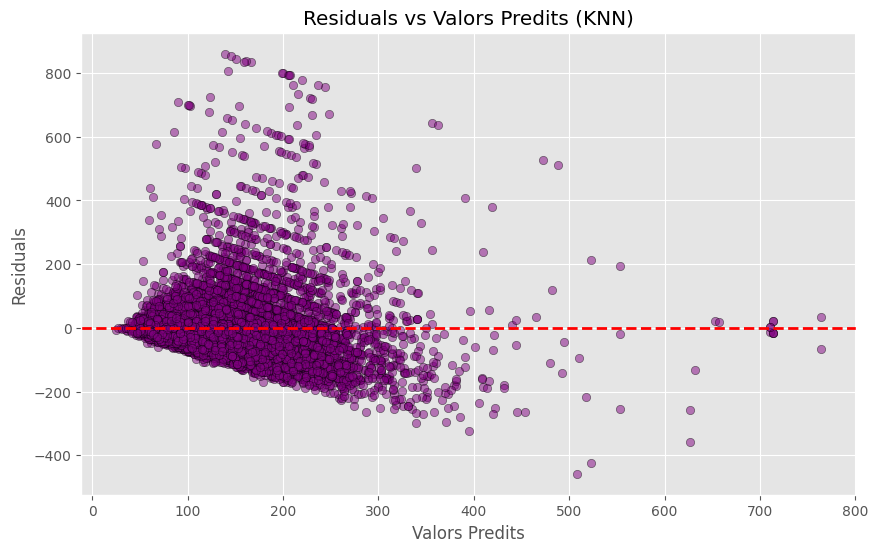

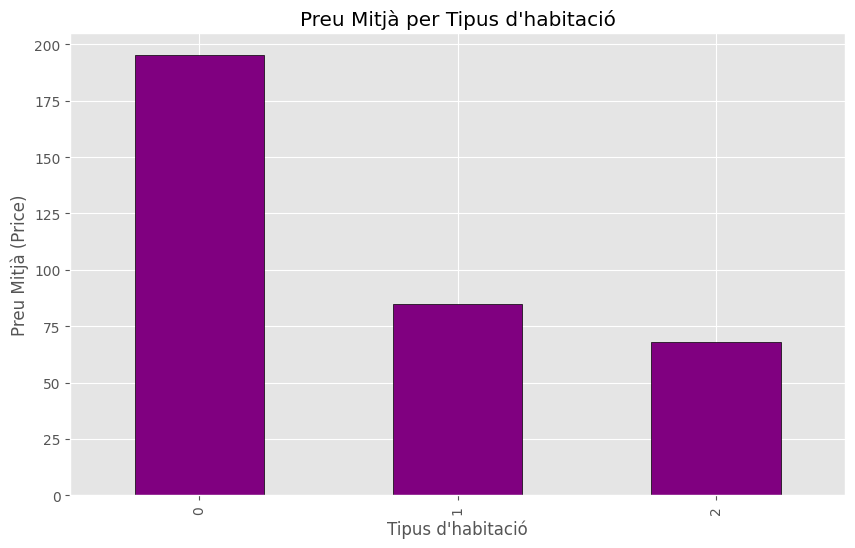

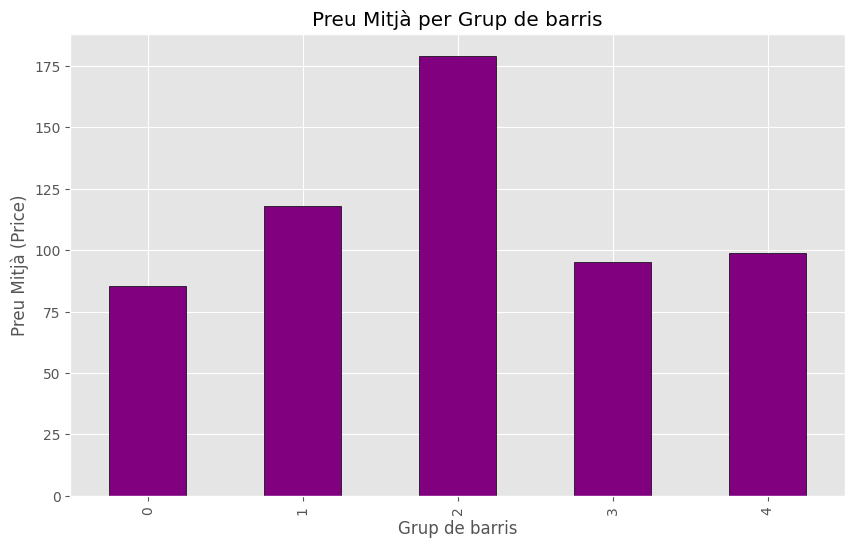

In [84]:
# Definim el model KNN
knn_model = KNeighborsRegressor()

# Definim els hiperparàmetres a explorar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Configuració de GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Entrenament del model utilitzant GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print("Temps d'entrenament (s):", end_time - start_time)

# Resultats de la millor combinació d'hiperparàmetres
best_model = grid_search.best_estimator_
print("Millors hiperparàmetres:", grid_search.best_params_)

# Avaluació del model amb el conjunt de prova
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Validació creuada per obtenir una mètrica més robusta
cv_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=3)
print("Cross-validated MSE:", -cv_scores.mean())

# Visualització de l'error entre prediccions i valors reals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Prediccions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Ideal")
plt.title('Comparació de Prediccions vs Valors Reals (KNN)')
plt.xlabel('Valors Reals (Price)')
plt.ylabel('Valors Predits (Price)')
plt.legend()
plt.grid(True)
plt.show()

# Gràfic de l'error residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribució dels Errors Residuals (KNN)')
plt.xlabel('Error Residual')
plt.ylabel('Freqüència')
plt.grid(True)
plt.show()

# Gràfic residuals vs prediccions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Valors Predits (KNN)')
plt.xlabel('Valors Predits')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Anàlisi sobre subsets específics
for subset, col in [('Tipus d\'habitació', 'room_type'), ('Grup de barris', 'neighbourhood_group')]:
    subset_groups = df.groupby(col)['price'].mean()
    plt.figure(figsize=(10, 6))
    subset_groups.plot(kind='bar', color='purple', edgecolor='black')
    plt.title(f'Preu Mitjà per {subset}')
    plt.xlabel(subset)
    plt.ylabel('Preu Mitjà (Price)')
    plt.grid(True)
    plt.show()


**Resultats de KNN**

**Millors Hiperparàmetres:**

- n_neighbors = 10: El model utilitza els 10 veïns més propers per predir el preu.
- p = 1: Fa servir la distància de Manhattan per calcular les similituds.
- weights = uniform: Tots els veïns tenen el mateix pes en la predicció.

**Rendiment:**

- Mean Squared Error (MSE): 10551.28, indicant un error relativament alt en comparació amb altres models.
- Root Mean Squared Error (RMSE) és de 102.72, mostrant una penalització més gran pels errors extrems. Això confirma que, malgrat que el model generalment té un bon rendiment, alguns errors més grans contribueixen significativament al RMSE. Aquestes mètriques indiquen que el model té un rendiment raonable però podria ser ajustat millor per millorar les prediccions.
- R² Score: 0.2186, indicant que només s’explica un 21.86% de la variabilitat del preu (price).
- Cross-validated MSE: 12285.54, que mostra que el model té dificultats per generalitzar en diferents particions.
- El Mean Absolute Error (MAE) és de 64.18, la qual cosa significa que, de mitjana, el model comet un error de 64 unitats de preu en les prediccions.

**Comparació Prediccions vs Valors Reals:**

Hi ha una dispersió elevada al voltant de la línia ideal (en vermell), mostrant que el model té dificultats per predir amb precisió, especialment per a preus alts.
Les prediccions tendeixen a subestimar els valors reals de preus alts.

**Distribució dels Errors Residuals:**

Els errors residuals estan centrats prop de 0, però amb una dispersió considerable.
S'observa un cert biaix positiu, indicant que el model subestima els preus en molts casos.

**Residuals vs Valors Predits**

Aquest gràfic mostra la dispersió dels residuals respecte als valors predits. Es pot veure que la majoria dels errors es concentren prop de la línia de referència (0), però hi ha una clara dispersió més gran a mesura que augmenten els valors predits. Això indica que el model funciona millor per preus baixos o mitjans, però té dificultats per predir amb precisió els preus més alts.

**Gràfic del Preu Mitjà per Tipus d'Habitació**

Aquest gràfic mostra la distribució del preu mitjà depenent del tipus d'habitació. S'observa que els preus més alts corresponen a habitacions del tipus "0", mentre que els tipus "1" i "2" tenen preus significativament més baixos. Això indica que el tipus d'habitació té una influència clara en el preu, essent una característica important per a la predicció.

**Gràfic del Preu Mitjà per Grup de Barris**

Els grups de barris també tenen una forta correlació amb els preus. El grup "2" presenta el preu mitjà més alt, seguit del grup "1". Això suggereix que la ubicació és una variable clau per determinar el preu, amb diferències significatives entre zones.

**Conclusions**: El model K-Nearest Neighbors (KNN) no ha mostrat un rendiment adequat per predir el preu (price) en aquest dataset. Amb un Mean Squared Error (MSE) de 10551.28 i un R² Score de 0.2186, el model explica només el 21.86% de la variabilitat en el preu, essent el model menys precís entre tots els avaluats. Els errors residuals mostren una gran dispersió, especialment per a preus alts, on el model tendeix a subestimar els valors reals.
Aquesta baixa precisió és esperable, ja que el KNN es basa en distàncies per fer prediccions, però no pot capturar relacions complexes o no lineals entre les variables del dataset. Tot i utilitzar els millors hiperparàmetres trobats amb GridSearchCV (n_neighbors = 10, p = 1, weights = uniform), el model no aconsegueix resultats competitius.


**Resum dels resultats de tots els models**


Resultats dels Models:

               Model  MSE (Test)  R² Score  Cross-validated MSE
0   Regressió Lineal     9291.89     0.288              9594.74
1      Random Forest     8125.57     0.377              8600.97
2  Gradient Boosting     7552.06     0.441              8551.80
3      Decision Tree     8502.85     0.370              9928.88
4                KNN    10551.28     0.219             12285.54


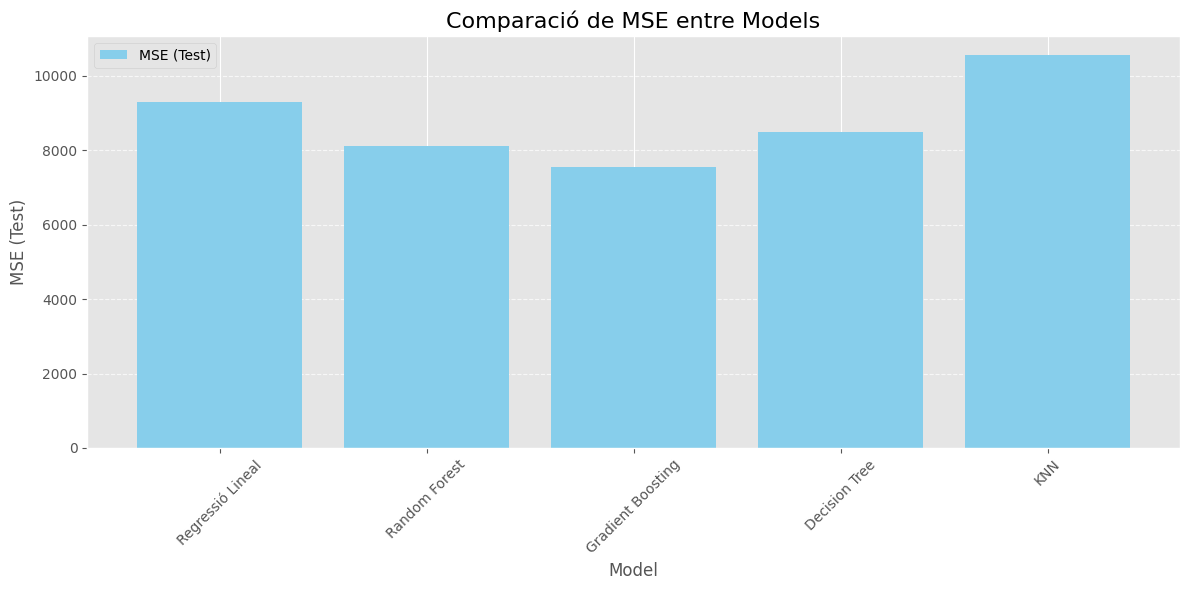

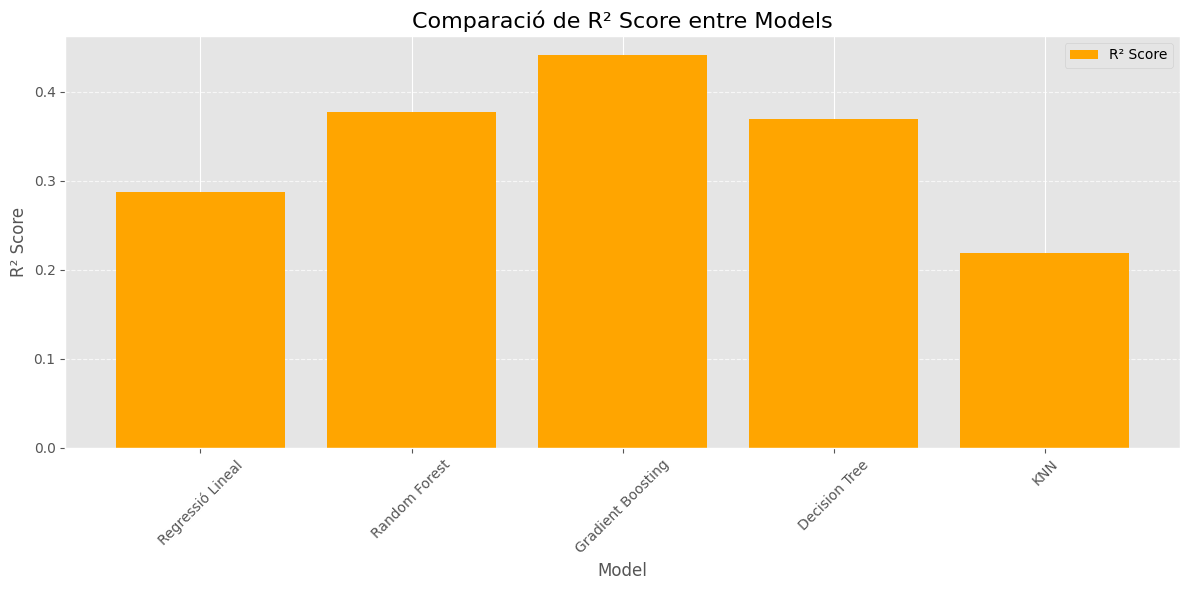

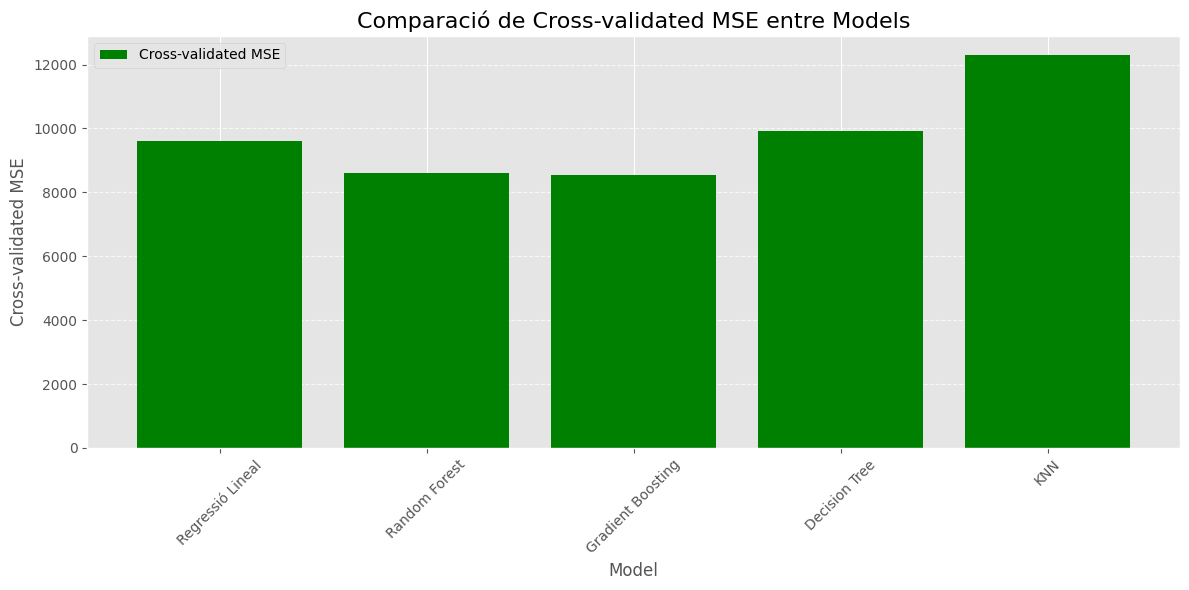

In [56]:
# Resultats dels models
models_results = {
    'Model': ['Regressió Lineal', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN'],
    'MSE (Test)': [9291.89, 8125.57, 7552.06, 8502.85, 10551.28],
    'R² Score': [0.288, 0.377, 0.441, 0.370, 0.219],
    'Cross-validated MSE': [9594.74, 8600.97, 8551.80, 9928.88, 12285.54]
}

# Convertim els resultats a un DataFrame
results_df = pd.DataFrame(models_results)

# Mostrem la taula
print("\nResultats dels Models:\n")
print(results_df)

# Gràfic comparatiu de les mètriques dels models
plt.figure(figsize=(12, 6))

# Comparació de MSE (Test)
plt.bar(results_df['Model'], results_df['MSE (Test)'], color='skyblue', label='MSE (Test)')
plt.title('Comparació de MSE entre Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE (Test)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gràfic comparatiu de R² Score
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['R² Score'], color='orange', label='R² Score')
plt.title('Comparació de R² Score entre Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gràfic comparatiu de Cross-validated MSE
plt.figure(figsize=(12, 6))
cv_mse_values = [mse if mse is not None else 0 for mse in results_df['Cross-validated MSE']]
plt.bar(results_df['Model'], cv_mse_values, color='green', label='Cross-validated MSE')
plt.title('Comparació de Cross-validated MSE entre Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Cross-validated MSE', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Comentari dels Resultats Finals dels Models**

1. **Regressió Lineal**:
   - **MSE (Test):** 9291.89
   - **R² Score:** 0.288
   - **Cross-validated MSE:** 9594.74
   - Com a model base, té un rendiment adequat però no és competitiu en comparació amb altres models més sofisticats. L'R² Score de 0.288 indica que només explica el 28.8% de la variabilitat del preu.

2. **Random Forest**:
   - **MSE (Test):** 8125.57
   - **R² Score:** 0.377
   - **Cross-validated MSE:** 8600.97
   - Mostra una millora significativa respecte a la regressió lineal. Captura relacions no lineals millor que altres models gràcies a la seva capacitat d'ensemblatge. Tot i així, no supera el Gradient Boosting.

3. **Gradient Boosting**:
   - **MSE (Test):** 7552.06
   - **R² Score:** 0.441
   - **Cross-validated MSE:** 8551.80
   - És el model amb millor rendiment global, amb un MSE més baix i un R² Score més alt (44.1%). Això el fa ideal per capturar patrons complexes del dataset.

4. **Decision Tree**:
   - **MSE (Test):** 8502.85
   - **R² Score:** 0.370
   - **Cross-validated MSE:** 9928.88
   - Tot i ser fàcilment interpretable, el seu rendiment és inferior al Gradient Boosting i Random Forest. És útil per explicabilitat, però no és el model més precís.

5. **KNN (K-Nearest Neighbors)**:
   - **MSE (Test):** 10551.28
   - **R² Score:** 0.219
   - **Cross-validated MSE:** 12285.54
   - És el model amb el pitjor rendiment. La seva simplicitat no li permet capturar patrons complexos del dataset. També té una alta sensibilitat a les dades i dimensions.

---

**Conclusió Final**

El **Gradient Boosting** és el millor model per predir el preu (`price`) gràcies al seu baix MSE i alt R² Score. Aquest model equilibra bé la precisió i la capacitat de generalització.

El **KNN**, en canvi, té el pitjor rendiment i no és adequat per aquest cas. La **Random Forest** també és una bona opció, especialment si busquem un model amb menys cost computacional però amb un rendiment competitiu.

Si el focus està en interpretabilitat, el **Decision Tree** és útil però sacrifica precisió. La **Regressió Lineal** pot servir com a model inicial per avaluar la influència de les variables.


In [27]:
# Linear Regression
#pipeline_linreg = Pipeline([
   # ('scaler', scaler),
    #('linreg', LinearRegression())
#])
#param_grid_linreg = {}

#grid_search_linreg = GridSearchCV(pipeline_linreg, param_grid_linreg, cv=5, scoring='r2', n_jobs=-1)
#grid_search_linreg.fit(X_train, y_train)

#best_params_linreg = grid_search_linreg.best_params_
#print("Linear Regression Best Hyperparameters:", best_params_linreg)

#best_linreg_model = grid_search_linreg.best_estimator_
#cv_scores_linreg = cross_val_score(best_linreg_model, X_train, y_train, cv=5, scoring='r2')
#print("Linear Regression Cross-Validation Scores:", cv_scores_linreg)
#print("Linear Regression Mean Cross-Validation Score:", cv_scores_linreg.mean())

#mae, mse, rmse = evaluate_model(best_linreg_model, X_test, y_test)
#print("Linear Regression MAE:", mae)
#print("Linear Regression MSE:", mse)
#print("Linear Regression RMSE:", rmse)


In [28]:
# Asumimos que X_train y y_train ya están definidos y preprocesados.

# 1. Convertir la variable objetivo (y) en clases discretas
# Dividimos los valores de precio (y) en 5 categorías (bins)
#y_class = pd.cut(y_train, bins=5, labels=[0, 1, 2, 3, 4])

# 2. Definir el modelo de Regresión Logística
#log_model = LogisticRegression(max_iter=1000)

# 3. Definir los hiperparámetros para la búsqueda
#param_grid_log = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# 4. Configurar StratifiedKFold
#stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Configurar GridSearchCV con StratifiedKFold
#log_search = GridSearchCV(log_model, param_grid_log, cv=stratified_kfold, scoring='accuracy', verbose=1)

# 6. Entrenar el modelo con GridSearchCV
#log_search.fit(X_train, y_class)

# 7. Obtener los mejores hiperparámetros
#best_log_params = log_search.best_params_
#print("Mejores hiperparámetros para Regresión Logística:", best_log_params)

# 8. Evaluar con validación cruzada
#best_log_model = LogisticRegression(**best_log_params, max_iter=1000)
#cv_scores_log = cross_val_score(best_log_model, X_train, y_class, cv=stratified_kfold, scoring='accuracy')
#cv_mean_log = cv_scores_log.mean()

#print("Puntuaciones de validación cruzada:", cv_scores_log)
#print("Puntuación media de validación cruzada:", cv_mean_log)